In [1]:
# Pandas and numpy for data manipulation
import pandas as pd
import numpy as np

#Loading libraries 
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0)
import seaborn as sns
from scipy import stats
from scipy.stats import norm

# No warnings about setting value on copy of slice
pd.options.mode.chained_assignment = None

# Display up to 60 columns of a dataframe
pd.set_option('display.max_columns', 60)

# Matplotlib visualization
import matplotlib.pyplot as plt
%matplotlib inline

# Set default font size
plt.rcParams['font.size'] = 24

# Internal ipython tool for setting figure size
from IPython.core.pylabtools import figsize

# Seaborn for visualization
import seaborn as sns
sns.set(font_scale = 2)

# Splitting data into training and testing
from sklearn.model_selection import train_test_split

# Data Reading

In [3]:
# Read in data into a dataframe 
data = pd.read_csv('D:\INSOFE\MyPractice and Work\WaterResource/Energy_and_Water_Data_Disclosure_for_Local_Law_84_2017__Data_for_Calendar_Year_2016_.csv')

# Display top of dataframe
data.head()

,Order,Property Id,Property Name,Parent Property Id,Parent Property Name,BBL - 10 digits,"NYC Borough, Block and Lot (BBL) self-reported",NYC Building Identification Number (BIN),Address 1 (self-reported),Address 2,Postal Code,Street Number,Street Name,Borough,DOF Gross Floor Area,Primary Property Type - Self Selected,List of All Property Use Types at Property,Largest Property Use Type,Largest Property Use Type - Gross Floor Area (ft²),2nd Largest Property Use Type,2nd Largest Property Use - Gross Floor Area (ft²),3rd Largest Property Use Type,3rd Largest Property Use Type - Gross Floor Area (ft²),Year Built,Number of Buildings - Self-reported,Occupancy,Metered Areas (Energy),Metered Areas (Water),ENERGY STAR Score,Site EUI (kBtu/ft²),Weather Normalized Site EUI (kBtu/ft²),Weather Normalized Site Electricity Intensity (kWh/ft²),Weather Normalized Site Natural Gas Intensity (therms/ft²),Weather Normalized Source EUI (kBtu/ft²),Fuel Oil #1 Use (kBtu),Fuel Oil #2 Use (kBtu),Fuel Oil #4 Use (kBtu),Fuel Oil #5 & 6 Use (kBtu),Diesel #2 Use (kBtu),District Steam Use (kBtu),Natural Gas Use (kBtu),Weather Normalized Site Natural Gas Use (therms),Electricity Use - Grid Purchase (kBtu),Weather Normalized Site Electricity (kWh),Total GHG Emissions (Metric Tons CO2e),Direct GHG Emissions (Metric Tons CO2e),Indirect GHG Emissions (Metric Tons CO2e),Property GFA - Self-Reported (ft²),Water Use (All Water Sources) (kgal),Water Intensity (All Water Sources) (gal/ft²),Source EUI (kBtu/ft²),Release Date,Water Required?,DOF Benchmarking Submission Status,Latitude,Longitude,Community Board,Council District,Census Tract,NTA
0,1,13286,201/205,13286,201/205,1013160001,1013160001,1037549,201/205 East 42nd st.,Not Available,10017,675,3 AVENUE,Manhattan,289356.0,Office,Office,Office,293447,Not Available,Not Available,Not Available,Not Available,1963,2,100,Whole Building,Not Available,Not Available,305.6,303.1,37.8,Not Available,614.2,Not Available,Not Available,Not Available,Not Available,Not Available,5.15506751E7,Not Available,Not Available,38139374.2,1.10827705E7,6962.2,0,6962.2,762051,Not Available,Not Available,619.4,05/01/2017 05:32:03 PM,No,In Compliance,40.750791,-73.973963,6.0,4.0,88.0,Turtle Bay-East Midtown ...
1,2,28400,NYP Columbia (West Campus),28400,NYP Columbia (West Campus),1021380040,1-02138-0040,1084198; 1084387;1084385; 1084386; 1084388; 10...,622 168th Street,Not Available,10032,180,FT WASHINGTON AVENUE,Manhattan,3693539.0,Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),3889181,Not Available,Not Available,Not Available,Not Available,1969,12,100,Whole Building,Whole Building,55,229.8,228.8,24.8,2.4,401.1,Not Available,1.96248472E7,Not Available,Not Available,Not Available,-3.914148026E8,933073441,9330734.4,332365924,9.62613121E7,55870.4,51016.4,4854.1,3889181,Not Available,Not Available,404.3,04/27/2017 11:23:27 AM,No,In Compliance,40.841402,-73.942568,12.0,10.0,251.0,Washington Heights South ...
2,3,4778226,MSCHoNY North,28400,NYP Columbia (West Campus),1021380030,1-02138-0030,1063380,3975 Broadway,Not Available,10032,3975,BROADWAY,Manhattan,152765.0,Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),231342,Not Available,Not Available,Not Available,Not Available,1924,1,100,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,0,0,0,231342,Not Available,Not Available,Not Available,04/27/2017 11:23:27 AM,No,In Compliance,40.840427,-73.940249,12.0,10.0,251.0,Washington Heights South ...
3,4,4778267,Herbert Irving Pavilion & Millstein Hospital,28400,NYP Columbia (West Campus),1021390001,1-02139-0001,1087281; 1076746,161 Fort Washington Ave,177 Fort Washington Ave,10032,161,FT WASHINGTON AVENUE,Manhattan,891040.0,Hos

In [4]:
print ('The data set has {0} rows and {1} columns'.format(data.shape[0],data.shape[1]))
print ('-------------------------------------------------------------------------------')
#print ('The test data has {0} rows and {1} columns'.format(test.shape[0],test.shape[1]))



The data set has 11746 rows and 60 columns
-------------------------------------------------------------------------------


In [5]:
#data_labels = data["ENERGY STAR Score"]

In [6]:
#data = data.drop(["ENERGY STAR Score"], axis =1)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11746 entries, 0 to 11745
Data columns (total 60 columns):
Order                                                         11746 non-null int64
Property Id                                                   11746 non-null int64
Property Name                                                 11746 non-null object
Parent Property Id                                            11746 non-null object
Parent Property Name                                          11746 non-null object
BBL - 10 digits                                               11735 non-null object
NYC Borough, Block and Lot (BBL) self-reported                11746 non-null object
NYC Building Identification Number (BIN)                      11746 non-null object
Address 1 (self-reported)                                     11746 non-null object
Address 2                                                     11746 non-null object
Postal Code                                          

# Checking for the missing Values

In [8]:
data.columns[data.isnull().any()]

Index(['BBL - 10 digits', 'Street Number', 'Street Name', 'Borough',
       'DOF Gross Floor Area', 'Water Required?',
       'DOF Benchmarking Submission Status', 'Latitude', 'Longitude',
       'Community Board', 'Council District', 'Census Tract', 'NTA'],
      dtype='object')

In [9]:
# Checmking the missing values Count
miss = data.isnull().sum()/len(data)
miss = miss[miss > 0]
miss.sort_values(inplace=True)
miss

BBL - 10 digits                       0.000936
DOF Benchmarking Submission Status    0.002554
Borough                               0.010046
DOF Gross Floor Area                  0.010046
Water Required?                       0.010046
Street Name                           0.010387
Street Number                         0.010557
Latitude                              0.192661
Longitude                             0.192661
Community Board                       0.192661
Council District                      0.192661
Census Tract                          0.192661
NTA                                   0.192661
dtype: float64

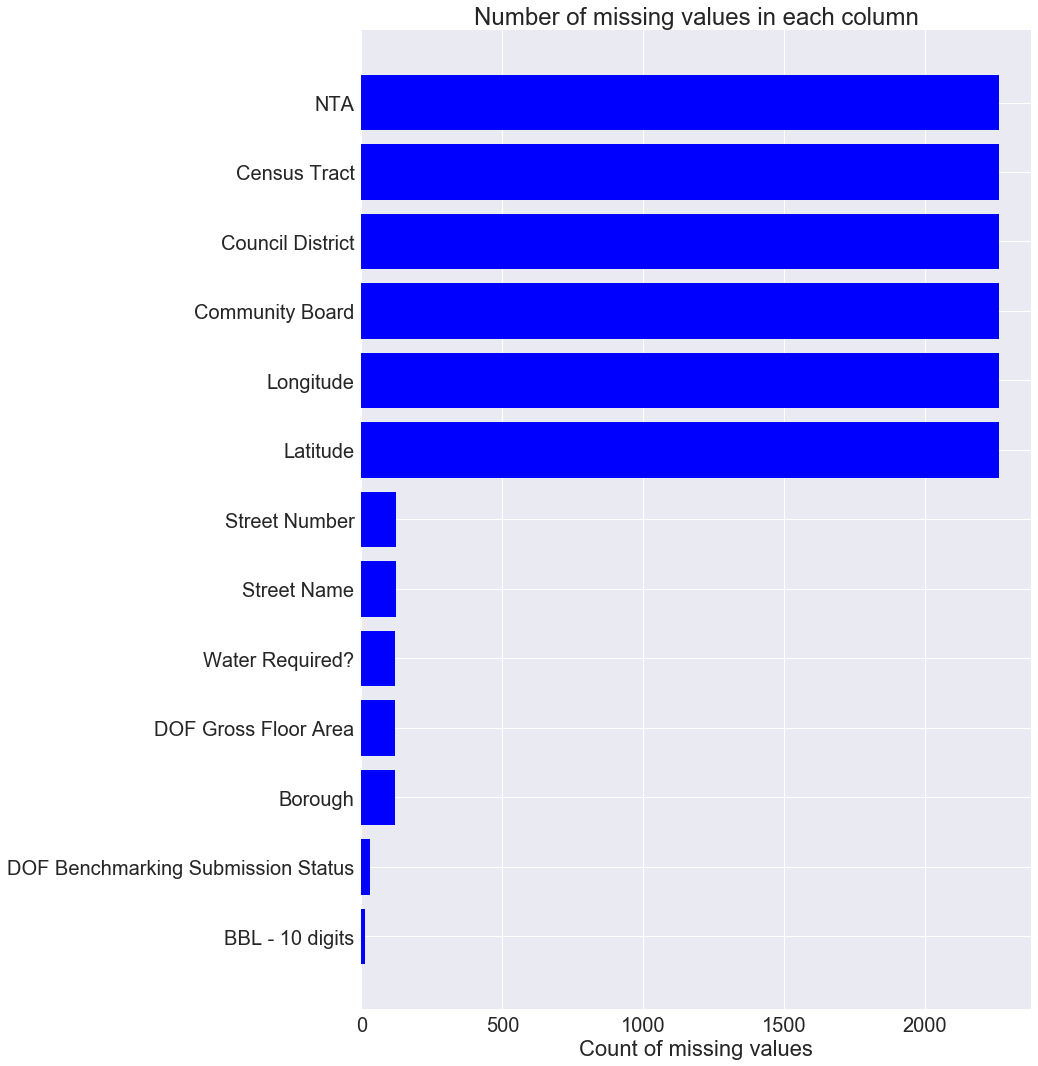

In [10]:
#Visualizing the missing values count
missing_df = data.isnull().sum(axis=0).reset_index()
missing_df.columns = ['column_name', 'missing_count']
missing_df = missing_df.loc[missing_df['missing_count']>0]
missing_df = missing_df.sort_values(by='missing_count')

ind = np.arange(missing_df.shape[0])
width = 0.9
fig, ax = plt.subplots(figsize=(12,18))
rects = ax.barh(ind, missing_df.missing_count.values, color='blue')
ax.set_yticks(ind)
ax.set_yticklabels(missing_df.column_name.values, rotation='horizontal')
ax.set_xlabel("Count of missing values")
ax.set_title("Number of missing values in each column")
plt.show()

In [11]:
data = data.replace({'Not Available': np.nan})

# Identify the Catagorical and Numerical Values

In [12]:
data.describe(include='all')

,Order,Property Id,Property Name,Parent Property Id,Parent Property Name,BBL - 10 digits,"NYC Borough, Block and Lot (BBL) self-reported",NYC Building Identification Number (BIN),Address 1 (self-reported),Address 2,Postal Code,Street Number,Street Name,Borough,DOF Gross Floor Area,Primary Property Type - Self Selected,List of All Property Use Types at Property,Largest Property Use Type,Largest Property Use Type - Gross Floor Area (ft²),2nd Largest Property Use Type,2nd Largest Property Use - Gross Floor Area (ft²),3rd Largest Property Use Type,3rd Largest Property Use Type - Gross Floor Area (ft²),Year Built,Number of Buildings - Self-reported,Occupancy,Metered Areas (Energy),Metered Areas (Water),ENERGY STAR Score,Site EUI (kBtu/ft²),Weather Normalized Site EUI (kBtu/ft²),Weather Normalized Site Electricity Intensity (kWh/ft²),Weather Normalized Site Natural Gas Intensity (therms/ft²),Weather Normalized Source EUI (kBtu/ft²),Fuel Oil #1 Use (kBtu),Fuel Oil #2 Use (kBtu),Fuel Oil #4 Use (kBtu),Fuel Oil #5 & 6 Use (kBtu),Diesel #2 Use (kBtu),District Steam Use (kBtu),Natural Gas Use (kBtu),Weather Normalized Site Natural Gas Use (therms),Electricity Use - Grid Purchase (kBtu),Weather Normalized Site Electricity (kWh),Total GHG Emissions (Metric Tons CO2e),Direct GHG Emissions (Metric Tons CO2e),Indirect GHG Emissions (Metric Tons CO2e),Property GFA - Self-Reported (ft²),Water Use (All Water Sources) (kgal),Water Intensity (All Water Sources) (gal/ft²),Source EUI (kBtu/ft²),Release Date,Water Required?,DOF Benchmarking Submission Status,Latitude,Longitude,Community Board,Council District,Census Tract,NTA
count,11746.000000,1.174600e+04,11746,11746,11746,11735,11735,11584,11746,207,11746,11622,11624,11628,1.162800e+04,11746,11746,11744,11744,3741,3741,1484,1484,11746.000000,11746.000000,11746.000000,11689,7137,9642,11583,10281,10959,9783,10281,9,2581,1321,594,16,936,10304,9784,11502,10960,11672,11663,11681,1.174600e+04,7762,7762,11583,11746,11628,11716,9483.000000,9483.000000,9483.000000,9483.000000,9483.000000,9483
unique,NaN,NaN,11740,102,103,11580,11581,11507,11645,176,286,4198,2024,5,NaN,55,813,53,9483,58,2263,49,963,NaN,NaN,NaN,7,6,100,1958,1943,440,65,2794,9,1905,1179,258,14,926,10154,9631,11405,10878,7817,5967,5852,NaN,7229,5606,2919,3537,2,1,NaN,NaN,NaN,NaN,NaN,144
top,NaN,NaN,Jetro Cash && Carry,Not Applicable: Standalone Property,Not Applicable: Standalone Property,1019730001,1019730001,4455438,410 West 118th Street,Default Info,10022,1,BROADWAY,Manhattan,NaN,Multifamily Housing,Multifamily Housing,Multifamily Housing,70000,Retail Store,0,Retail Store,0,NaN,NaN,NaN,Whole Building,Whole Building,100,75.3,85.5,4,0,123.5,4938946.7,0,0,0,0,1.02082936E7,0,0,0,0,0,0,0,NaN,0,0,107.7,05/01/2017 02:58:14 PM,Yes,In Compliance,NaN,NaN,NaN,NaN,NaN,Midtown-Midtown South ...
freq,NaN,NaN,2,11324,11324,26,26,13,12,14,269,66,390,5176,NaN,8688,6182,8694,61,948,144,297,67,NaN,NaN,NaN,11648,7111,649,29,26,230,1851,18,1,403,122,331,3,4,46,41,23,23,108,892,194,NaN,64,67,22,1258,7552,11716,NaN,NaN,NaN,NaN,NaN,720
mean,7185.759578,3.642958e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.732695e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1948.738379,1.289971,98.762557,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.673739e+05,NaN,NaN,NaN,NaN,NaN,NaN,40.754379,-73.957057,7.140673,15.771275,4977.596647,NaN
std,4323.859984,1.049070e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.367055e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.576386,4.017484,7.501603,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.189238e+05,NaN,NaN,NaN,NaN,NaN,NaN,0.080120,0.046337,3.954129,15.674375,13520.422990,NaN
min,1.000000,7.365000e+03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.002800e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1600.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,40.516065,-74.243582

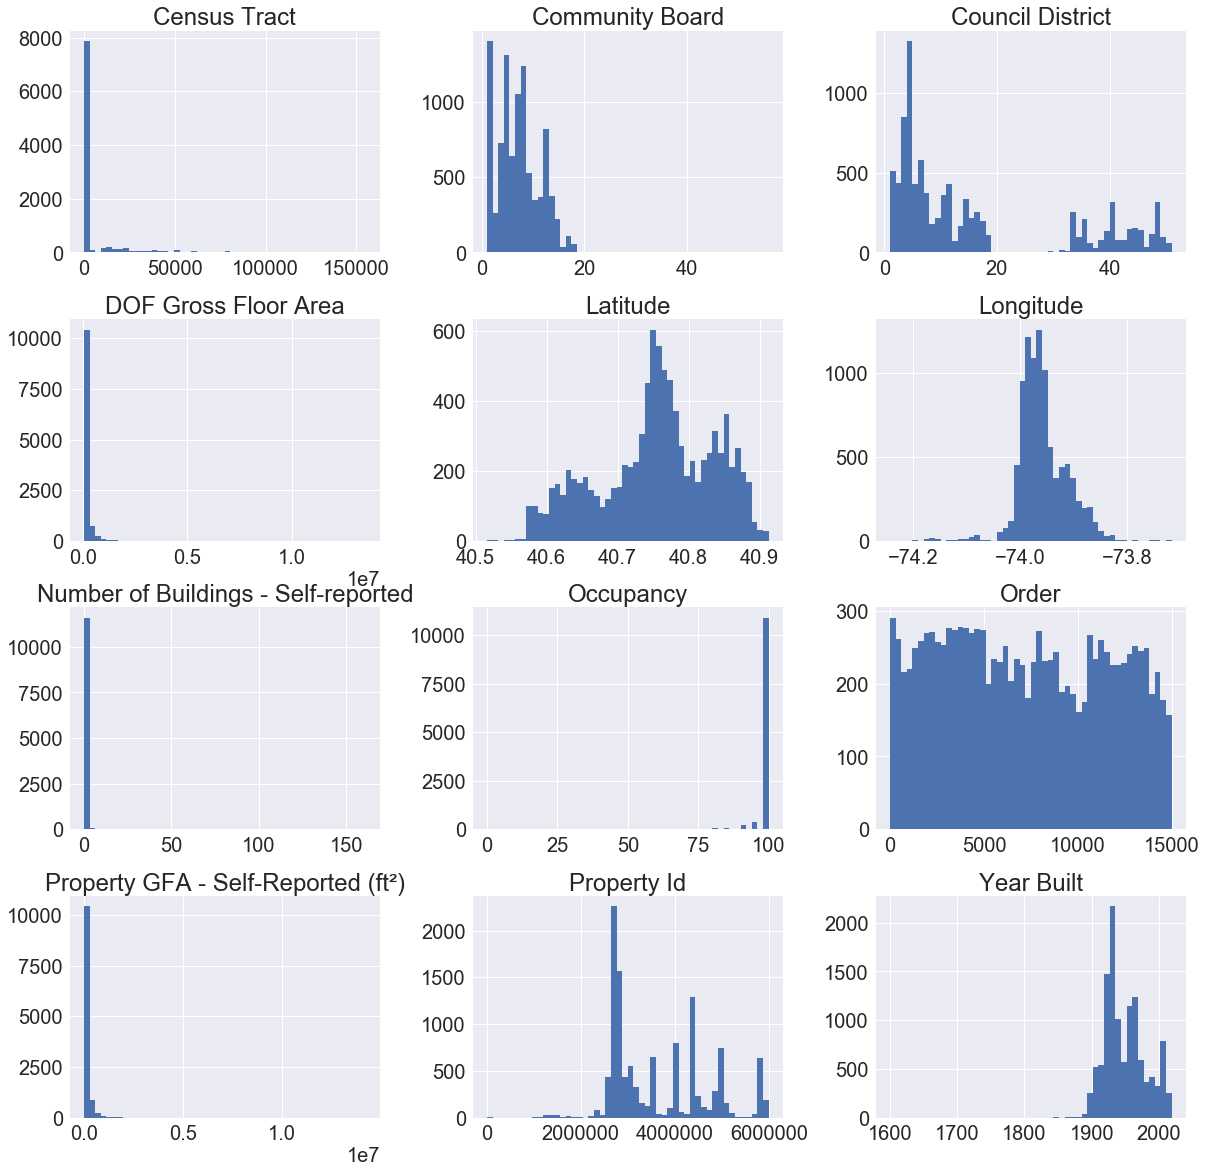

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
data.hist(bins=50, figsize=(20,20))
plt.savefig("attribute_histogram_plots")
plt.show()

# Checking for Missing Values

In [14]:
# Function to calculate missing values by column
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [15]:
missing_values_table(data)

Your selected dataframe has 60 columns.
There are 46 columns that have missing values.


,Missing Values,% of Total Values
Fuel Oil #1 Use (kBtu),11737,99.9
Diesel #2 Use (kBtu),11730,99.9
Address 2,11539,98.2
Fuel Oil #5 & 6 Use (kBtu),11152,94.9
District Steam Use (kBtu),10810,92.0
Fuel Oil #4 Use (kBtu),10425,88.8
3rd Largest Property Use Type - Gross Floor Area (ft²),10262,87.4
3rd Largest Property Use Type,10262,87.4
Fuel Oil #2 Use (kBtu),9165,78.0
2nd Largest Property Use Type,8005,68.2


In [16]:
# Get the columns with > 50% missing
missing_df = missing_values_table(data);
missing_columns = list(missing_df[missing_df['% of Total Values'] > 50].index)
print('We will remove %d columns that has more than 50 Percent missing values.' % len(missing_columns))

Your selected dataframe has 60 columns.
There are 46 columns that have missing values.
We will remove 11 columns that has more than 50 Percent missing values.


In [17]:
# Drop the columns
data = data.drop(columns = list(missing_columns))

# For older versions of pandas (https://github.com/pandas-dev/pandas/issues/19078)
# data = data.drop(list(missing_columns), axis = 1)

In [18]:
data.columns.unique

<bound method Index.unique of Index(['Order', 'Property Id', 'Property Name', 'Parent Property Id',
       'Parent Property Name', 'BBL - 10 digits',
       'NYC Borough, Block and Lot (BBL) self-reported',
       'NYC Building Identification Number (BIN)', 'Address 1 (self-reported)',
       'Postal Code', 'Street Number', 'Street Name', 'Borough',
       'DOF Gross Floor Area', 'Primary Property Type - Self Selected',
       'List of All Property Use Types at Property',
       'Largest Property Use Type',
       'Largest Property Use Type - Gross Floor Area (ft²)', 'Year Built',
       'Number of Buildings - Self-reported', 'Occupancy',
       'Metered Areas (Energy)', 'Metered Areas  (Water)', 'ENERGY STAR Score',
       'Site EUI (kBtu/ft²)', 'Weather Normalized Site EUI (kBtu/ft²)',
       'Weather Normalized Site Electricity Intensity (kWh/ft²)',
       'Weather Normalized Site Natural Gas Intensity (therms/ft²)',
       'Weather Normalized Source EUI (kBtu/ft²)', 'Natural Gas Us

In [19]:
unique_counts = pd.DataFrame.from_records([(col, data[col].nunique()) for col in data.columns],
                          columns=['Column_Name', 'Num_Unique']).sort_values(by=['Num_Unique'])
unique_counts

,Column_Name,Num_Unique
42,DOF Benchmarking Submission Status,1
41,Water Required?,2
12,Borough,5
22,Metered Areas (Water),6
21,Metered Areas (Energy),7
45,Community Board,19
20,Occupancy,19
46,Council District,44
19,Number of Buildings - Self-reported,49
16,Largest Property Use Type,53


# Convert Data Types to Correct


In [26]:
# Iterate through the columns
for col in list(data.columns):
    # Select columns that should be numeric
    if ('ft²' in col or 'kBtu' in col or 'Metric Tons CO2e' in col or 'kWh' in 
        col or 'therms' in col or 'gal' in col or 'Score' in col):
        # Convert the data type to float
        data[col] = data[col].astype(float)

In [27]:
cols_to_exclude = ['DOF Benchmarking Submission Status']
for col in data.columns:
    if data[col].nunique() < 10 and col not in cols_to_exclude:
        data[col] = data[col].astype('category')

In [28]:
unique = fs.unique_stats

NameError: name 'fs' is not defined

In [23]:
unique

NameError: name 'unique' is not defined

In [24]:
unique.sort_values(['nunique'],ascending="False")

NameError: name 'unique' is not defined

In [29]:
#Rename "ENERGY STAR Score" to Score
data = data.rename(columns = {'ENERGY STAR Score': 'score'})
data.head(2)

,Order,Property Id,Property Name,Parent Property Id,Parent Property Name,BBL - 10 digits,"NYC Borough, Block and Lot (BBL) self-reported",NYC Building Identification Number (BIN),Address 1 (self-reported),Postal Code,Street Number,Street Name,Borough,DOF Gross Floor Area,Primary Property Type - Self Selected,List of All Property Use Types at Property,Largest Property Use Type,Largest Property Use Type - Gross Floor Area (ft²),Year Built,Number of Buildings - Self-reported,Occupancy,Metered Areas (Energy),Metered Areas (Water),score,Site EUI (kBtu/ft²),Weather Normalized Site EUI (kBtu/ft²),Weather Normalized Site Electricity Intensity (kWh/ft²),Weather Normalized Site Natural Gas Intensity (therms/ft²),Weather Normalized Source EUI (kBtu/ft²),Natural Gas Use (kBtu),Weather Normalized Site Natural Gas Use (therms),Electricity Use - Grid Purchase (kBtu),Weather Normalized Site Electricity (kWh),Total GHG Emissions (Metric Tons CO2e),Direct GHG Emissions (Metric Tons CO2e),Indirect GHG Emissions (Metric Tons CO2e),Property GFA - Self-Reported (ft²),Water Use (All Water Sources) (kgal),Water Intensity (All Water Sources) (gal/ft²),Source EUI (kBtu/ft²),Release Date,Water Required?,DOF Benchmarking Submission Status,Latitude,Longitude,Community Board,Council District,Census Tract,NTA
0,1,13286,201/205,13286,201/205,1013160001,1013160001,1037549,201/205 East 42nd st.,10017,675,3 AVENUE,Manhattan,289356.0,Office,Office,Office,293447.0,1963,2,100,Whole Building,NaN,NaN,305.6,303.1,37.8,NaN,614.2,NaN,NaN,38139374.2,11082770.5,6962.2,0.0,6962.2,762051.0,NaN,NaN,619.4,05/01/2017 05:32:03 PM,No,In Compliance,40.750791,-73.973963,6.0,4.0,88.0,Turtle Bay-East Midtown ...
1,2,28400,NYP Columbia (West Campus),28400,NYP Columbia (West Campus),1021380040,1-02138-0040,1084198; 1084387;1084385; 1084386; 1084388; 10...,622 168th Street,10032,180,FT WASHINGTON AVENUE,Manhattan,3693539.0,Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),3889181.0,1969,12,100,Whole Building,Whole Building,55.0,229.8,228.8,24.8,2.4,401.1,933073441.0,9330734.4,332365924.0,96261312.1,55870.4,51016.4,4854.1,3889181.0,NaN,NaN,404.3,04/27/2017 11:23:27 AM,No,In Compliance,40.841402,-73.942568,12.0,10.0,251.0,Washington Heights South ...


# Univariate Analysys and Visualization

In [30]:

print("Skewness: %f" % data.score.skew())
print("Kurtosis: %f" % data.score.kurt())

Skewness: -0.451861
Kurtosis: -0.954480


C:\Users\Gnanendra\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\Gnanendra\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Gnanendra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\Gnanendra\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < 

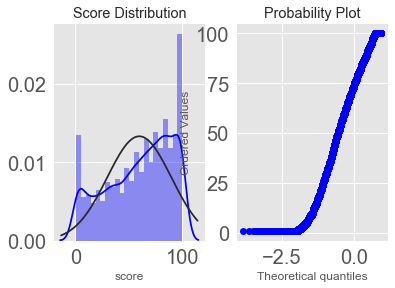

Skewness: -0.451861
Kurtosis: -0.954480


In [31]:
# Let us analyse the Target
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
plt.style.use(style='ggplot')

#Check the Skewness and Kurtosis of Target variable
plt.figure()
plt.subplot(1, 2, 1)
plt.title("Score Distribution")
sns.distplot(data.score.dropna(), fit=stats.norm, color='blue')
plt.subplot(1, 2, 2)
stats.probplot(data.score, plot=plt)
plt.show()
print("Skewness: %f" % data.score.skew())
print("Kurtosis: %f" % data.score.kurt())

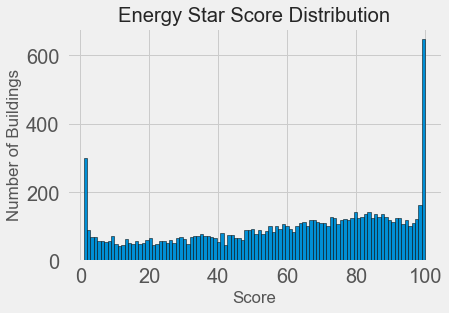

In [32]:
# Histogram of the Energy Star Score
plt.style.use('fivethirtyeight')
plt.hist(data['score'].dropna(), bins = 100, edgecolor = 'k');
plt.xlabel('Score'); plt.ylabel('Number of Buildings'); 
plt.title('Energy Star Score Distribution');

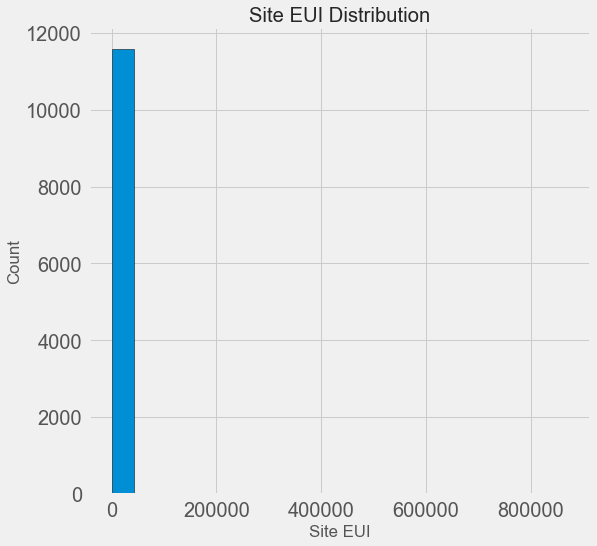

In [33]:
# Histogram Plot of Site EUI
figsize(8, 8)
plt.hist(data['Site EUI (kBtu/ft²)'].dropna(), bins = 20, edgecolor = 'black');
plt.xlabel('Site EUI'); 
plt.ylabel('Count'); plt.title('Site EUI Distribution');

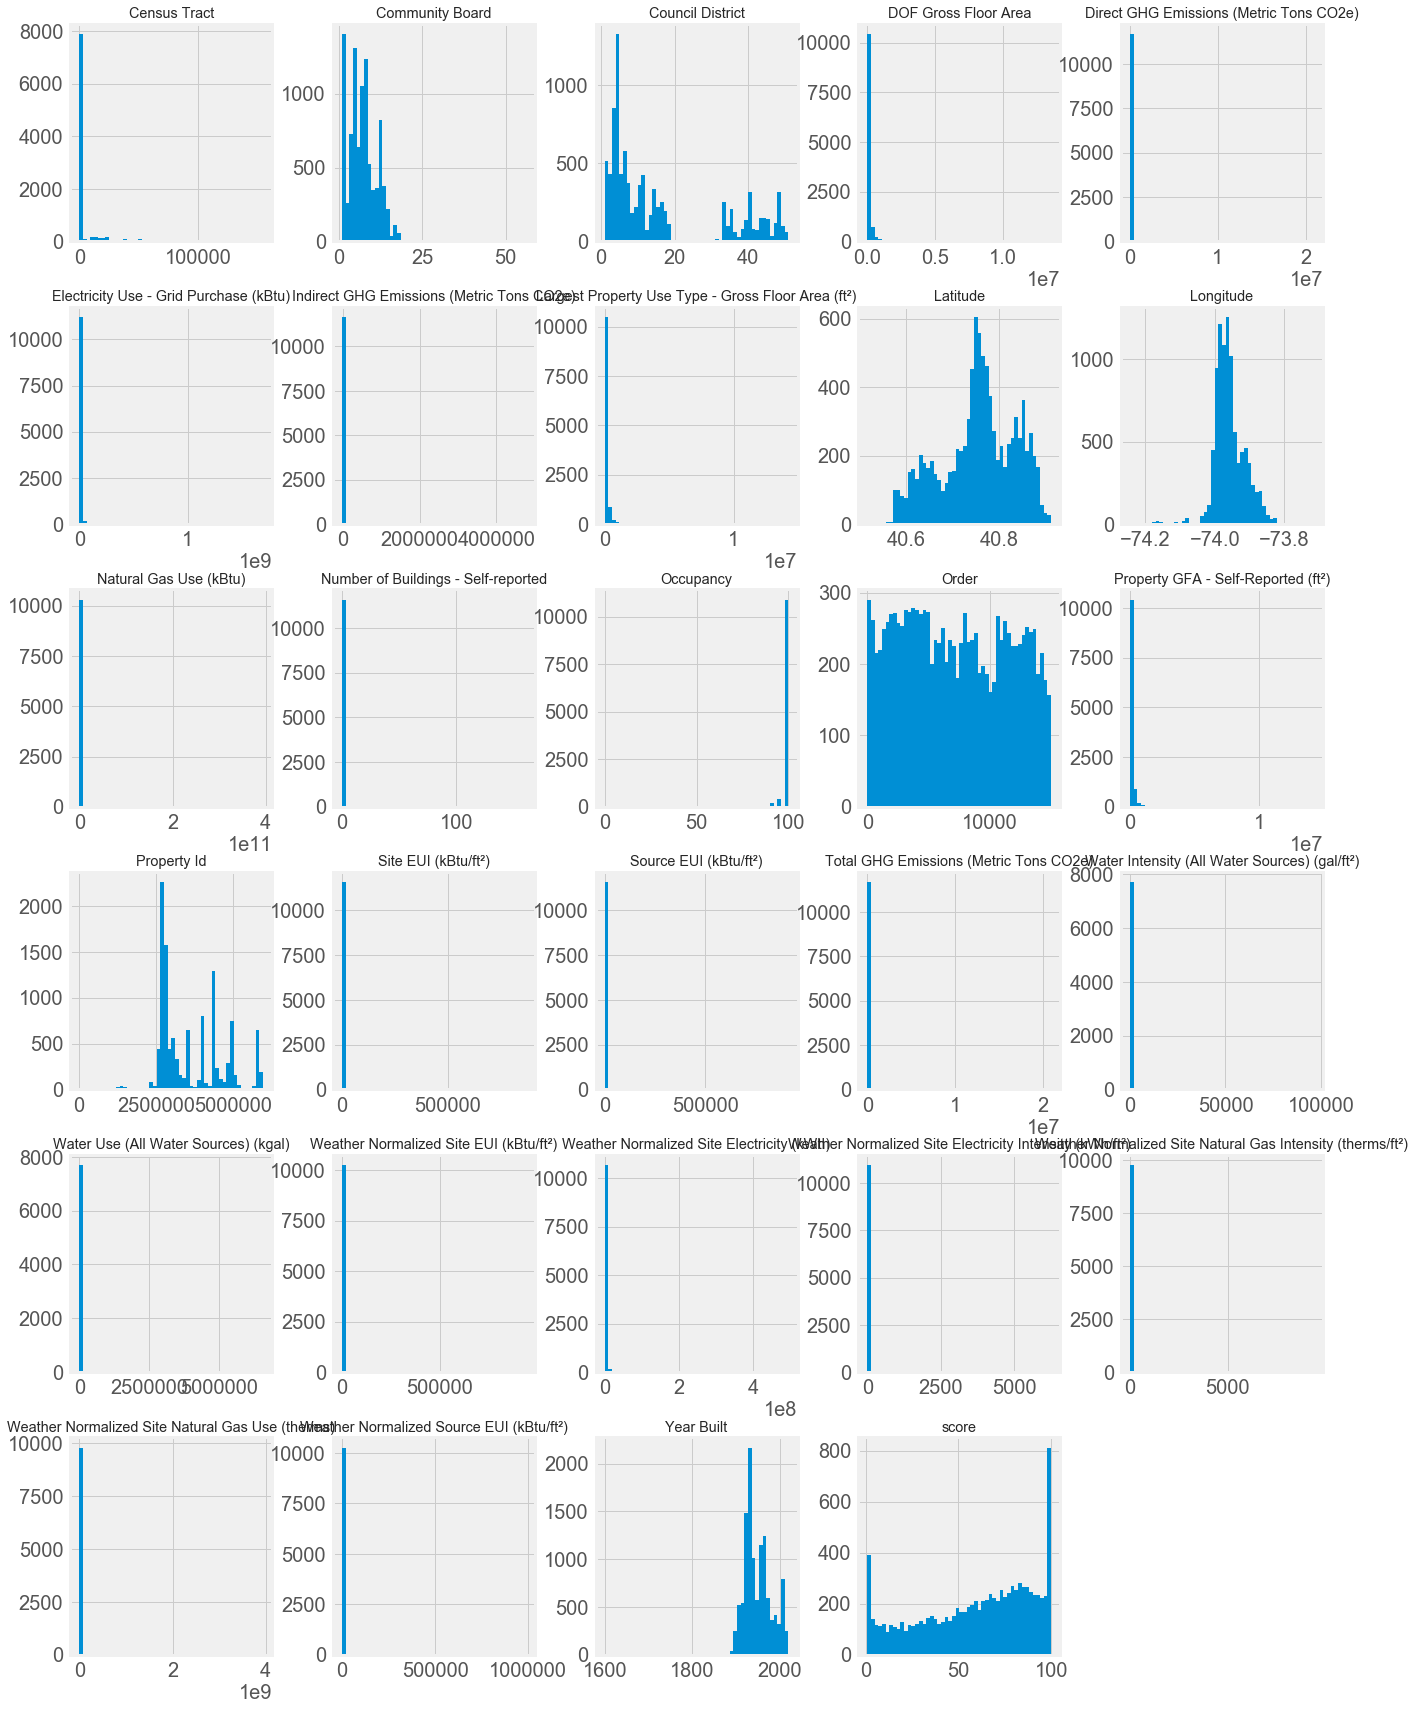

In [34]:
%matplotlib inline
import matplotlib.pyplot as plt
data.hist(bins=50, figsize=(20,30))
plt.savefig("attribute_histogram_plots")
plt.show()

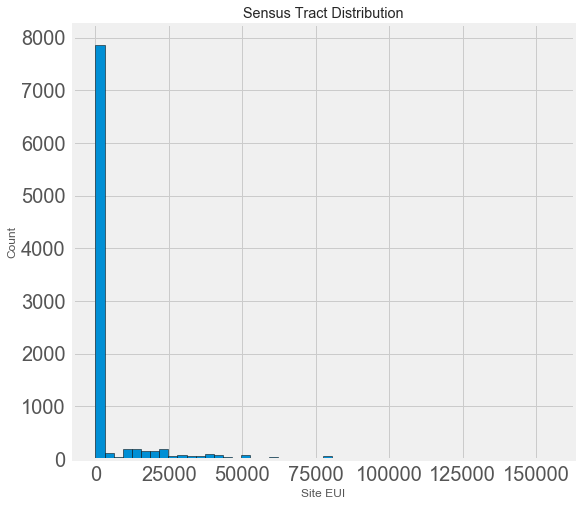

In [35]:
# Histogram Plot of Census Tract
figsize(8, 8)
plt.hist(data['Census Tract'].dropna(), bins = 50, edgecolor = 'black');
plt.xlabel('Site EUI'); 
plt.ylabel('Count'); plt.title('Sensus Tract Distribution');

In [36]:
data["Census Tract"].describe()

count      9483.000000
mean       4977.596647
std       13520.422990
min           1.000000
25%         100.000000
50%         201.000000
75%         531.500000
max      155101.000000
Name: Census Tract, dtype: float64

In [37]:
data['Census Tract'].dropna().sort_values().tail(20)

11528    101001.0
11529    101001.0
11530    101001.0
11522    101002.0
11521    101002.0
11519    101002.0
11505    103202.0
8225     105804.0
9462     105804.0
8227     105804.0
11444    107201.0
8199     114202.0
8197     114202.0
8198     114202.0
8205     117602.0
10       155101.0
9        155101.0
8        155101.0
7        155101.0
11       155101.0
Name: Census Tract, dtype: float64

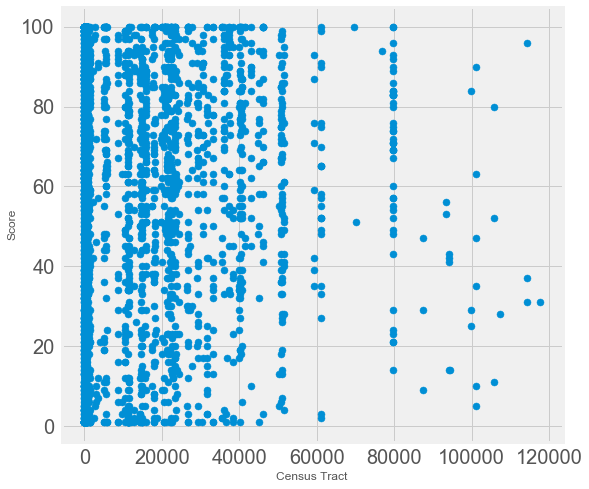

In [38]:
plt.scatter(x=data['Census Tract'], y=data["score"])
plt.ylabel('Score')
plt.xlabel('Census Tract')
plt.show()

In [39]:
#There are some out liers, >100000, Let us remove them
data = data[data['Census Tract'] < 80000]

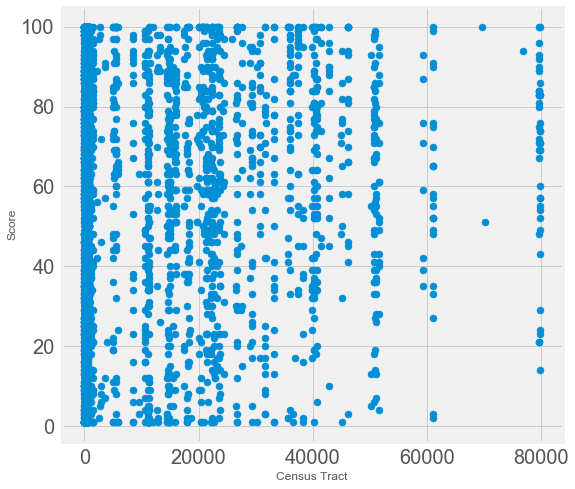

In [40]:
plt.scatter(x=data['Census Tract'], y=data["score"])
plt.ylabel('Score')
plt.xlabel('Census Tract')
plt.show()

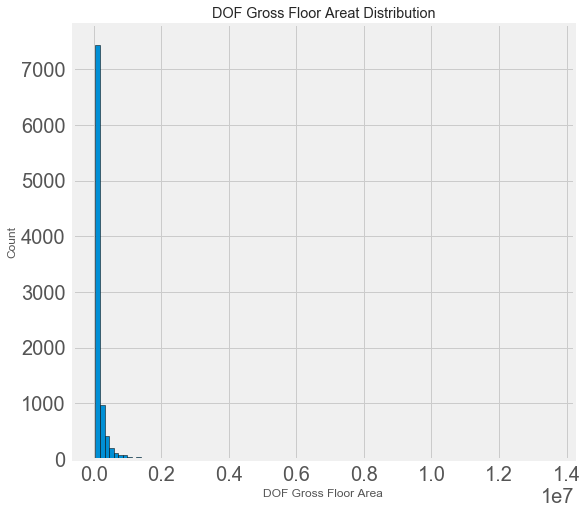

In [41]:
# Histogram Plot of Census Tract
figsize(8, 8)
plt.hist(data['DOF Gross Floor Area'].dropna(), bins = 100, edgecolor = 'black');
plt.xlabel('DOF Gross Floor Area'); 
plt.ylabel('Count'); plt.title('DOF Gross Floor Areat Distribution');

In [42]:
data["DOF Gross Floor Area"].describe()

count    9.447000e+03
mean     1.752580e+05
std      3.365978e+05
min      5.002800e+04
25%      6.492150e+04
50%      9.272800e+04
75%      1.612280e+05
max      1.354011e+07
Name: DOF Gross Floor Area, dtype: float64

In [43]:
data["DOF Gross Floor Area"].dropna().sort_values().tail(20)

2305     2508386.0
422      2542563.0
193      2548000.0
1392     2689635.0
3134     2734038.0
2484     2797249.0
1752     2812739.0
3133     2963699.0
2267     3122165.0
510      3678000.0
1        3693539.0
96       3693539.0
6885     3911254.0
6888     3911254.0
7153     5541031.0
6880     8512479.0
6883     8512479.0
6871     8512479.0
2266     8942176.0
7158    13540113.0
Name: DOF Gross Floor Area, dtype: float64

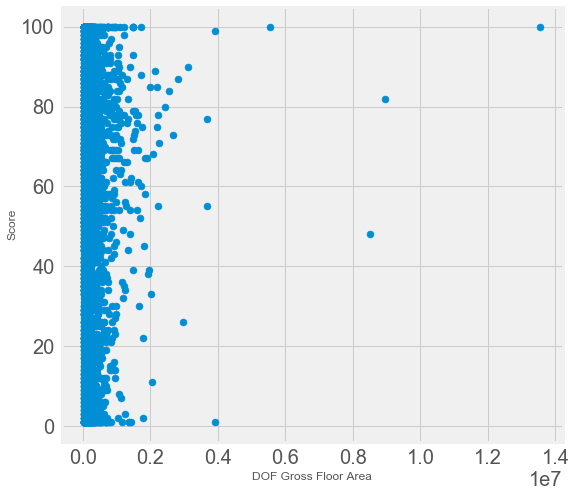

In [44]:
plt.scatter(x=data['DOF Gross Floor Area'], y=data["score"])
plt.ylabel('Score')
plt.xlabel('DOF Gross Floor Area')
plt.show()

In [45]:
#There are some out liers, >100000, Let us remove them
#data = data[data['DOF Gross Floor Area'] < 0.4]

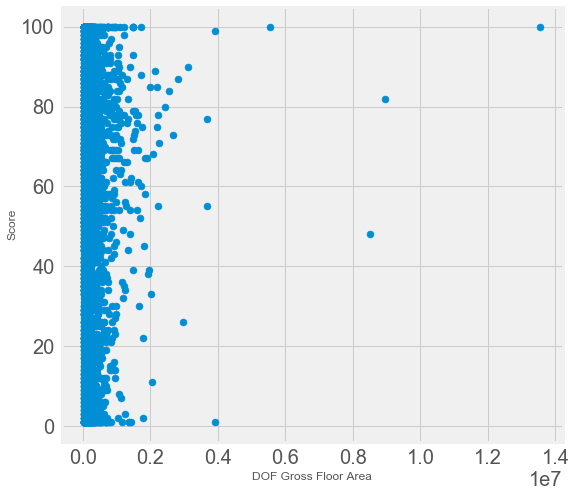

In [46]:
plt.scatter(x=data['DOF Gross Floor Area'], y=data["score"])
plt.ylabel('Score')
plt.xlabel('DOF Gross Floor Area')
plt.show()

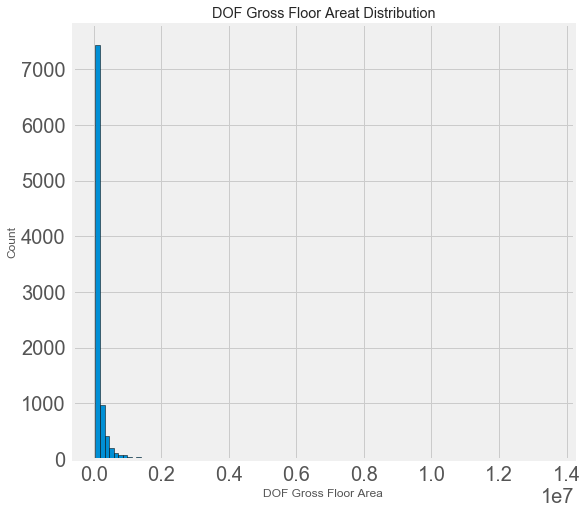

In [47]:
# Histogram Plot of Census Tract
figsize(8, 8)
plt.hist(data['DOF Gross Floor Area'].dropna(), bins = 100, edgecolor = 'black');
plt.xlabel('DOF Gross Floor Area'); 
plt.ylabel('Count'); plt.title('DOF Gross Floor Areat Distribution');

In [48]:
data["DOF Gross Floor Area"].dropna().sort_values().tail(20)

2305     2508386.0
422      2542563.0
193      2548000.0
1392     2689635.0
3134     2734038.0
2484     2797249.0
1752     2812739.0
3133     2963699.0
2267     3122165.0
510      3678000.0
1        3693539.0
96       3693539.0
6885     3911254.0
6888     3911254.0
7153     5541031.0
6880     8512479.0
6883     8512479.0
6871     8512479.0
2266     8942176.0
7158    13540113.0
Name: DOF Gross Floor Area, dtype: float64

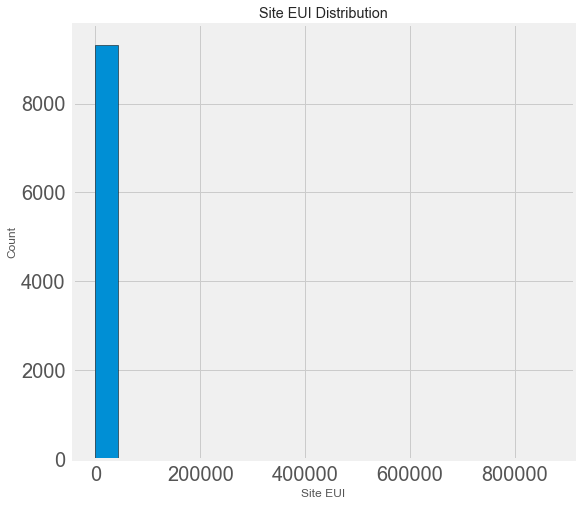

In [49]:
# Histogram Plot of Site EUI
figsize(8, 8)
plt.hist(data['Site EUI (kBtu/ft²)'].dropna(), bins = 20, edgecolor = 'black');
plt.xlabel('Site EUI'); 
plt.ylabel('Count'); plt.title('Site EUI Distribution');

In [50]:
# Calculate first and third quartile
first_quartile = data['Site EUI (kBtu/ft²)'].describe()['25%']
third_quartile = data['Site EUI (kBtu/ft²)'].describe()['75%']

# Interquartile range
iqr = third_quartile - first_quartile

# Remove outliers
data = data[(data['Site EUI (kBtu/ft²)'] > (first_quartile - 3 * iqr)) &
            (data['Site EUI (kBtu/ft²)'] < (third_quartile + 3 * iqr))]

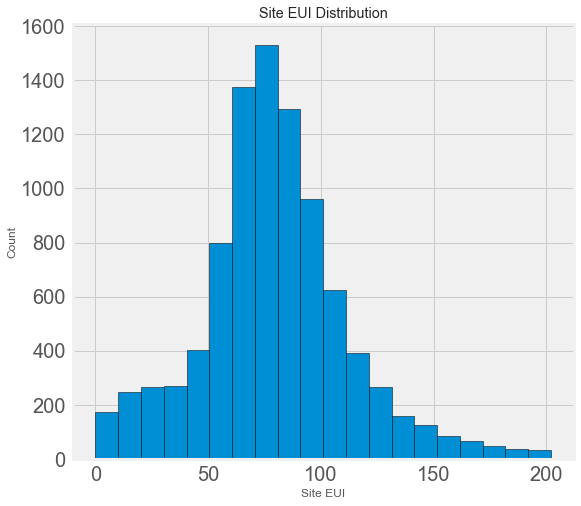

In [51]:
# Histogram Plot of Site EUI
figsize(8, 8)
plt.hist(data['Site EUI (kBtu/ft²)'].dropna(), bins = 20, edgecolor = 'black');
plt.xlabel('Site EUI'); 
plt.ylabel('Count'); plt.title('Site EUI Distribution');

In [52]:
# Calculate first and third quartile
first_quartile = data['DOF Gross Floor Area'].describe()['25%']
third_quartile = data['DOF Gross Floor Area'].describe()['75%']

# Interquartile range
iqr = third_quartile - first_quartile

# Remove outliers
data = data[(data['DOF Gross Floor Area'] > (first_quartile - 3 * iqr)) &
            (data['DOF Gross Floor Area'] < (third_quartile + 3 * iqr))]

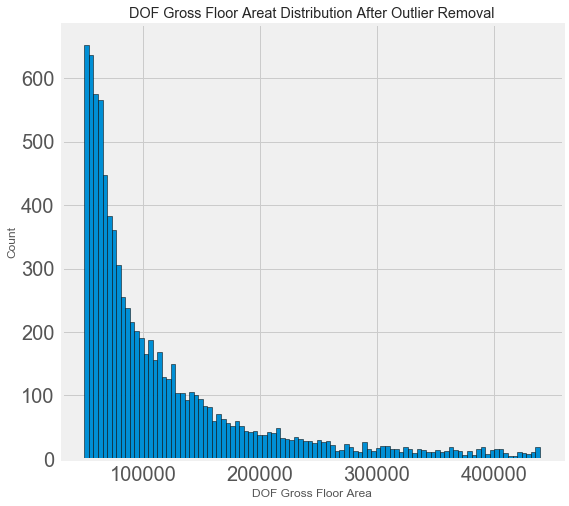

In [53]:
# Histogram Plot of Census Tract
figsize(8, 8)
plt.hist(data['DOF Gross Floor Area'].dropna(), bins = 100, edgecolor = 'black');
plt.xlabel('DOF Gross Floor Area'); 
plt.ylabel('Count'); plt.title('DOF Gross Floor Areat Distribution After Outlier Removal');

# Seperating Numerical and Catagorical Data and analysing them

In [54]:
#separate variables into new data frames
numeric_data = data.select_dtypes(include=[np.number])
cat_data = data.select_dtypes(exclude=[np.number])
print ("There are {} numeric and {} categorical columns in train data".format(numeric_data.shape[1],cat_data.shape[1]))

There are 29 numeric and 20 categorical columns in train data


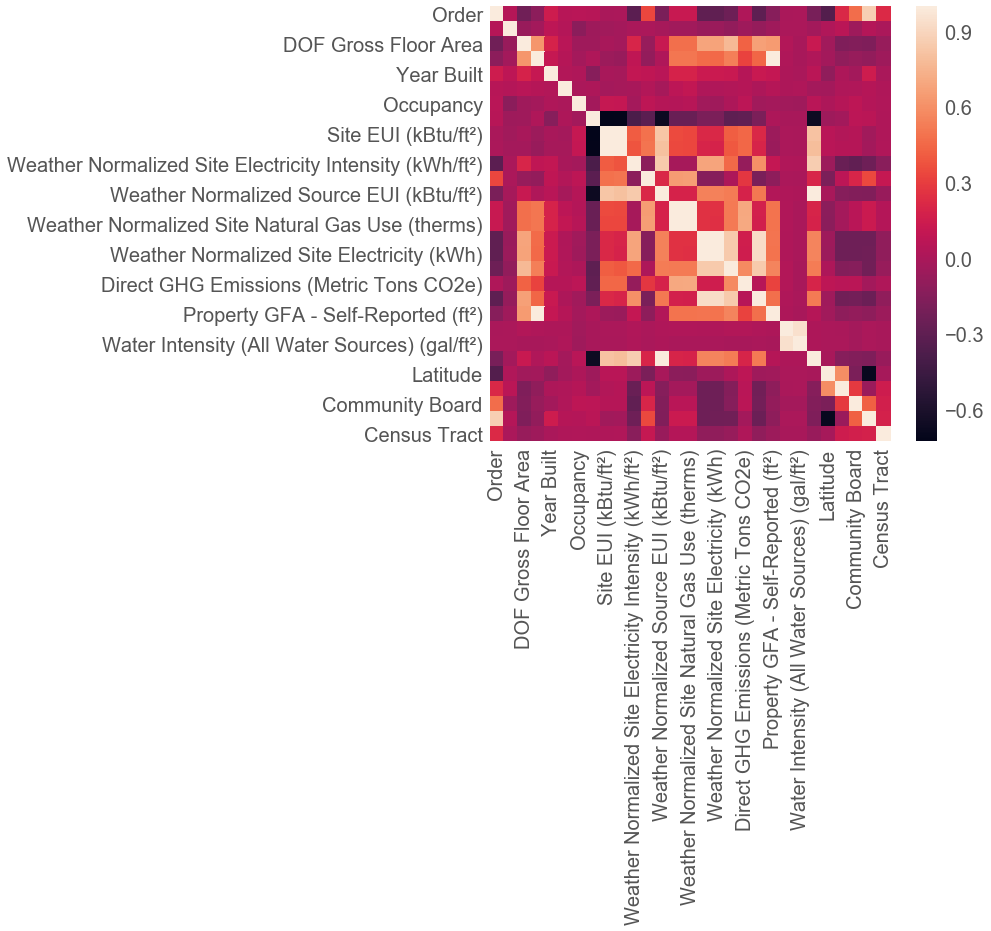

In [55]:
#correlation plot
corr = numeric_data.corr()
sns.heatmap(corr)


In [56]:
print (corr['score'].sort_values(ascending=False)[:15], '\n') #top 15 values
print ('----------------------')
print (corr['score'].sort_values(ascending=False)[-15:]) #last 5 values`

score                                                 1.000000
Community Board                                       0.071498
Council District                                      0.067987
Order                                                 0.054226
Census Tract                                          0.017037
Largest Property Use Type - Gross Floor Area (ft²)    0.016635
Number of Buildings - Self-reported                   0.013761
Property GFA - Self-Reported (ft²)                    0.011994
Water Intensity (All Water Sources) (gal/ft²)        -0.005923
Water Use (All Water Sources) (kgal)                 -0.008854
Longitude                                            -0.028875
Occupancy                                            -0.030568
DOF Gross Floor Area                                 -0.043682
Property Id                                          -0.051930
Latitude                                             -0.052053
Name: score, dtype: float64 

----------------------
La

In [57]:
cat_data

,Property Name,Parent Property Id,Parent Property Name,BBL - 10 digits,"NYC Borough, Block and Lot (BBL) self-reported",NYC Building Identification Number (BIN),Address 1 (self-reported),Postal Code,Street Number,Street Name,Borough,Primary Property Type - Self Selected,List of All Property Use Types at Property,Largest Property Use Type,Metered Areas (Energy),Metered Areas (Water),Release Date,Water Required?,DOF Benchmarking Submission Status,NTA
19,- 720 Ft. Washington Ave. bldg,2780056,720-730 Ft. Washington Owners Corp.,1021800614,1021800614,1064475,720-730 Ft. Washington Ave.,10040,720,FT WASHINGTON AVENUE,Manhattan,Multifamily Housing,Multifamily Housing,Multifamily Housing,Whole Building,NaN,05/01/2017 10:09:31 PM,NaN,In Compliance,Washington Heights North ...
20,- 730 Ft. Washington Ave bldg,2780056,720-730 Ft. Washington Owners Corp.,1021800628,1021800628,1064476;1803806,720-730 Ft. Washington Ave.,10040,730,FT WASHINGTON AVENUE,Manhattan,Multifamily Housing,Multifamily Housing,Multifamily Housing,Whole Building,NaN,05/01/2017 10:09:31 PM,Yes,In Compliance,Washington Heights North ...
22,- 830 Park Avenue bldg,2806486,Park 76th Street Inc.,1013900037,1013900037,1041702,830 Park Avenue,10021,830,PARK AVENUE,Manhattan,Multifamily Housing,Multifamily Housing,Multifamily Housing,Another configuration,NaN,05/01/2017 10:09:31 PM,NaN,In Compliance,Upper East Side-Carnegie Hill ...
23,- 840 Park Avenue bldg,2806486,Park 76th Street Inc.,1013910034,1013910034,1041800,840 Park Avenue,10021,840,PARK AVENUE,Manhattan,Multifamily Housing,Multifamily Housing,Multifamily Housing,Another configuration,NaN,05/01/2017 10:09:31 PM,Yes,In Compliance,Upper East Side-Carnegie Hill ...
25,558 RIVERSIDE DRIVE,2809896,560 Riverside Drive,1019950053,1019950053,1059890,558 RIVERSIDE DRIVE,10027,558,RIVERSIDE DRIVE,Manhattan,College/University,College/University,College/University,Whole Building,NaN,04/24/2017 06:52:20 PM,Yes,In Compliance,Morningside Heights ...
26,564 RIVERSIDE DRIVE,2809896,560 Riverside Drive,1019950063,1019950063,1059891,560 Riverside Drive,10027,564,RIVERSIDE DRIVE,Manhattan,College/University,College/University,College/University,Whole Building,NaN,04/24/2017 06:52:20 PM,No,In Compliance,Morningside Heights ...
27,Meyer Hall,2825730,Meyer Hall,1005460031,1005460031,1008816,4-6 Washington Place,10003,4,WASHINGTON PLACE,Manhattan,College/University,College/University,College/University,Whole Building,Whole Building,04/28/2017 07:15:52 PM,NaN,In Compliance,West Village ...
30,Metro North - 420-440 East 102 St.,3111973,Metro North - 420-440 East 102 St.,1016940003,1-01694-0003,1083934,420-440 East 102 St.,10029,455,EAST 102 STREET,Manhattan,Multifamily Housing,Multifamily Housing,Multifamily Housing,Whole Building,Whole Building,04/30/2017 02:15:35 PM,NaN,In Compliance,East Harlem South ...
40,514 West 114th Street,3612678,Columbia University (morningside),1018850040,1018850040,1057034,410 West 118th Street,10027,514,WEST 114 STREET,Manhattan,Multifamily Housing,Multifamily Housing,Multifamily Housing,Whole Building,NaN,04/24/2017 06:52:20 PM,NaN,In Compliance,Morningside Heights ...
41,520 West 114th,3612678,Columbia University (morningside),1018850043,1018850043,1057035,520 West 114th Street,10027,520,WEST 114 STREET,Manhattan,Residence Hall/Dormitory,Residence Hall/Dormitory,Residence Hall/Dormitory,Whole Building,NaN,04/24/2017 06:52:20 PM,NaN,In Compliance,Morningside Heights ...


In [58]:
# Create a list of buildings with more than 100 measurements
types = data.dropna(subset=['score'])
types = types['Largest Property Use Type'].value_counts()
types = list(types[types.values > 100].index)

In [59]:
types

['Multifamily Housing', 'Office', 'Hotel']

C:\Users\Gnanendra\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


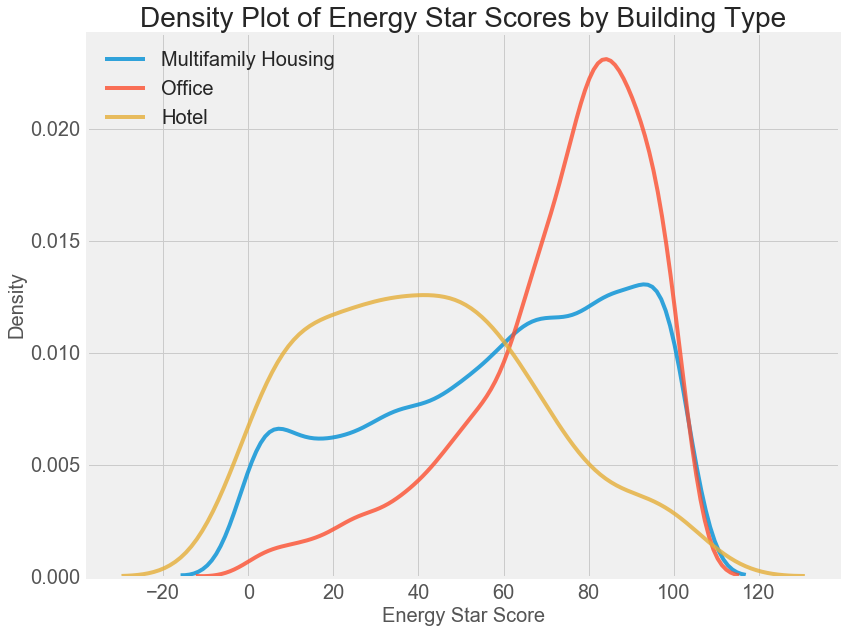

In [60]:
# Plot of distribution of scores for building categories
figsize(12, 10)

# Plot each building
for b_type in types:
    # Select the building type
    subset = data[data['Largest Property Use Type'] == b_type]
    
    # Density plot of Energy Star scores
    sns.kdeplot(subset['score'].dropna(),
               label = b_type, shade = False, alpha = 0.8);
    
# label the plot
plt.xlabel('Energy Star Score', size = 20); plt.ylabel('Density', size = 20); 
plt.title('Density Plot of Energy Star Scores by Building Type', size = 28);

In [61]:
# Create a list of boroughs with more than 100 observations
boroughs = data.dropna(subset=['score'])
boroughs = boroughs['Borough'].value_counts()
boroughs = list(boroughs[boroughs.values > 100].index)

C:\Users\Gnanendra\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


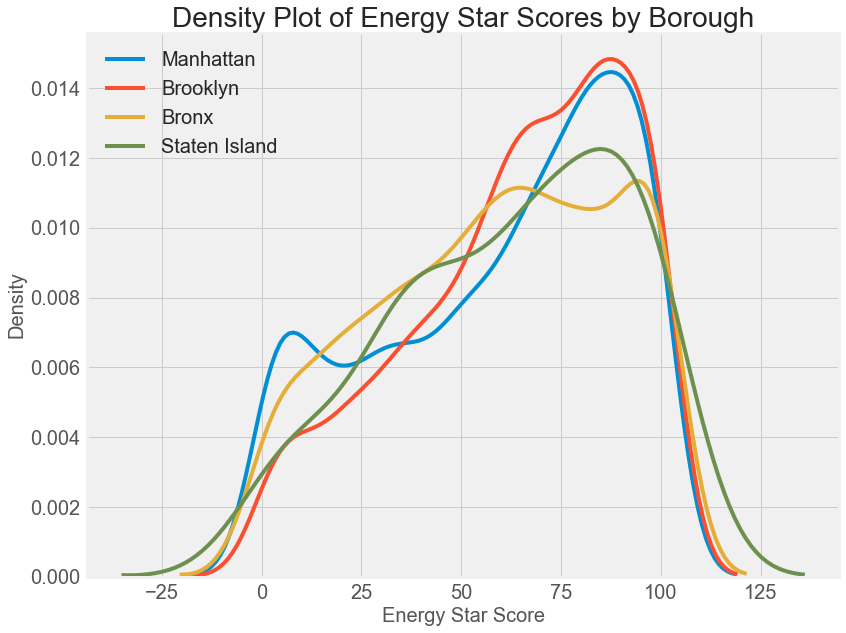

In [62]:
# Plot of distribution of scores for boroughs
figsize(12, 10)

# Plot each borough distribution of scores
for borough in boroughs:
    # Select the building type
    subset = data[data['Borough'] == borough]
    
    # Density plot of Energy Star scores
    sns.kdeplot(subset['score'].dropna(),
               label = borough);
    
# label the plot
plt.xlabel('Energy Star Score', size = 20); plt.ylabel('Density', size = 20); 
plt.title('Density Plot of Energy Star Scores by Borough', size = 28);

In [63]:
## Find all correlations and sort 
correlations_data = data.corr()['score'].sort_values()

# Print the most negative correlations
print(correlations_data.head(15), '\n')

# Print the most positive correlations
print(correlations_data.tail(15))

Site EUI (kBtu/ft²)                                          -0.726674
Weather Normalized Site EUI (kBtu/ft²)                       -0.714033
Weather Normalized Source EUI (kBtu/ft²)                     -0.666207
Source EUI (kBtu/ft²)                                        -0.660579
Weather Normalized Site Electricity Intensity (kWh/ft²)      -0.387862
Weather Normalized Site Natural Gas Intensity (therms/ft²)   -0.317759
Total GHG Emissions (Metric Tons CO2e)                       -0.306875
Direct GHG Emissions (Metric Tons CO2e)                      -0.288909
Natural Gas Use (kBtu)                                       -0.261005
Weather Normalized Site Natural Gas Use (therms)             -0.254981
Electricity Use - Grid Purchase (kBtu)                       -0.184076
Weather Normalized Site Electricity (kWh)                    -0.182385
Indirect GHG Emissions (Metric Tons CO2e)                    -0.182198
Year Built                                                   -0.134353
Latitu

In [64]:
cat_data.describe()

,Property Name,Parent Property Id,Parent Property Name,BBL - 10 digits,"NYC Borough, Block and Lot (BBL) self-reported",NYC Building Identification Number (BIN),Address 1 (self-reported),Postal Code,Street Number,Street Name,Borough,Primary Property Type - Self Selected,List of All Property Use Types at Property,Largest Property Use Type,Metered Areas (Energy),Metered Areas (Water),Release Date,Water Required?,DOF Benchmarking Submission Status,NTA
count,8571,8571,8571,8571,8571,8471,8571,8571,8571,8571,8571,8571,8571,8571,8567,5359,8571,8506,8549,8571
unique,8568,44,44,8534,8534,8461,8541,177,2468,1496,5,44,569,45,3,6,2686,2,1,140
top,Club Quarters Hotel,Not Applicable: Standalone Property,Not Applicable: Standalone Property,3019200001,3-01920-0001,3334960,410 West 118th Street,10025,1,BROADWAY,Manhattan,Multifamily Housing,Multifamily Housing,Multifamily Housing,Whole Building,Whole Building,05/01/2017 02:58:14 PM,Yes,In Compliance,Midtown-Midtown South ...
freq,2,8435,8435,8,8,2,10,238,53,320,4489,6608,4677,6614,8552,5345,980,5503,8549,573


# Analysing the Catagorical Varaibles

In [65]:
score_pivot = data.pivot_table(index='Borough', values='score', aggfunc=np.median)
score_pivot

,score
Borough,
Bronx,61.0
Brooklyn,68.0
Manhattan,66.0
Queens,53.0
Staten Island,67.0


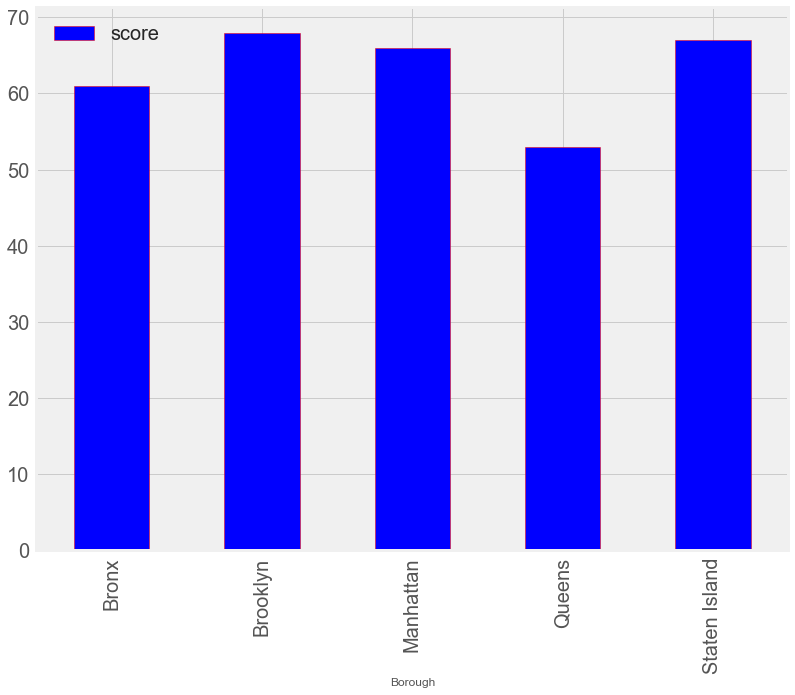

In [66]:
score_pivot.plot(kind='bar',color='blue', edgecolor = 'red')

In [67]:
cat = ['Borough', 'Metered Areas (Energy)', 'Metered Areas (Water)', 'Water Required?']
def anova(frame):
    anv = pd.DataFrame()
    anv['features'] = cat
    pvals = []
    for c in cat:
           samples = []
           for cls in frame[c].unique():
                  s = frame[frame[c] == cls]['score'].values
                  samples.append(s)
           pval = stats.f_oneway(*samples)[1]
           pvals.append(pval)
    anv['pval'] = pvals
    return anv.sort_values('pval')

cat_data['score'] = data.score.values
k = anova(cat_data) 
k['disparity'] = np.log(1./k['pval'].values) 
sns.barplot(data=k, x = 'features', y='disparity') 
plt.xticks(rotation=90) 
plt 

C:\Users\Gnanendra\Anaconda3\lib\site-packages\scipy\stats\stats.py:2923: RuntimeWarning: invalid value encountered in double_scalars
  ssbn += _square_of_sums(a - offset) / float(len(a))


KeyError: 'Metered Areas (Water)'

In [68]:
MAW_pivot = data.pivot_table(index='Water Required?', values='score', aggfunc=np.median)
MAW_pivot

,score
Water Required?,
No,66.0
Yes,66.0


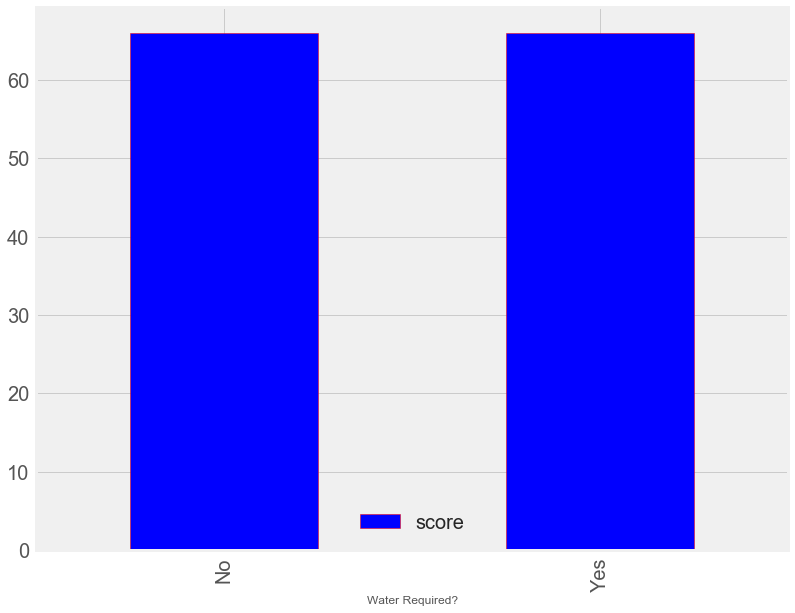

In [69]:
MAW_pivot.plot(kind='bar',color='blue', edgecolor = 'red')

In [70]:
MAE_pivot = data.pivot_table(index='Metered Areas (Energy)', values='score', aggfunc=np.median)
MAE_pivot

,score
Metered Areas (Energy),
Another configuration,100.0
Whole Building,66.0


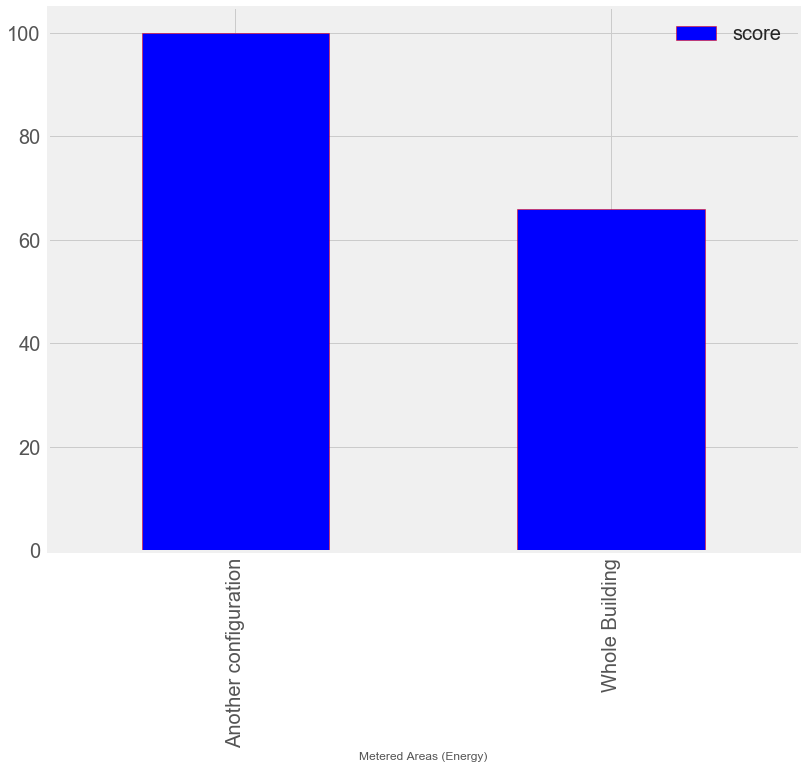

In [71]:
MAE_pivot.plot(kind='bar',color='blue', edgecolor = 'red')

TypeError: distplot() missing 1 required positional argument: 'a'

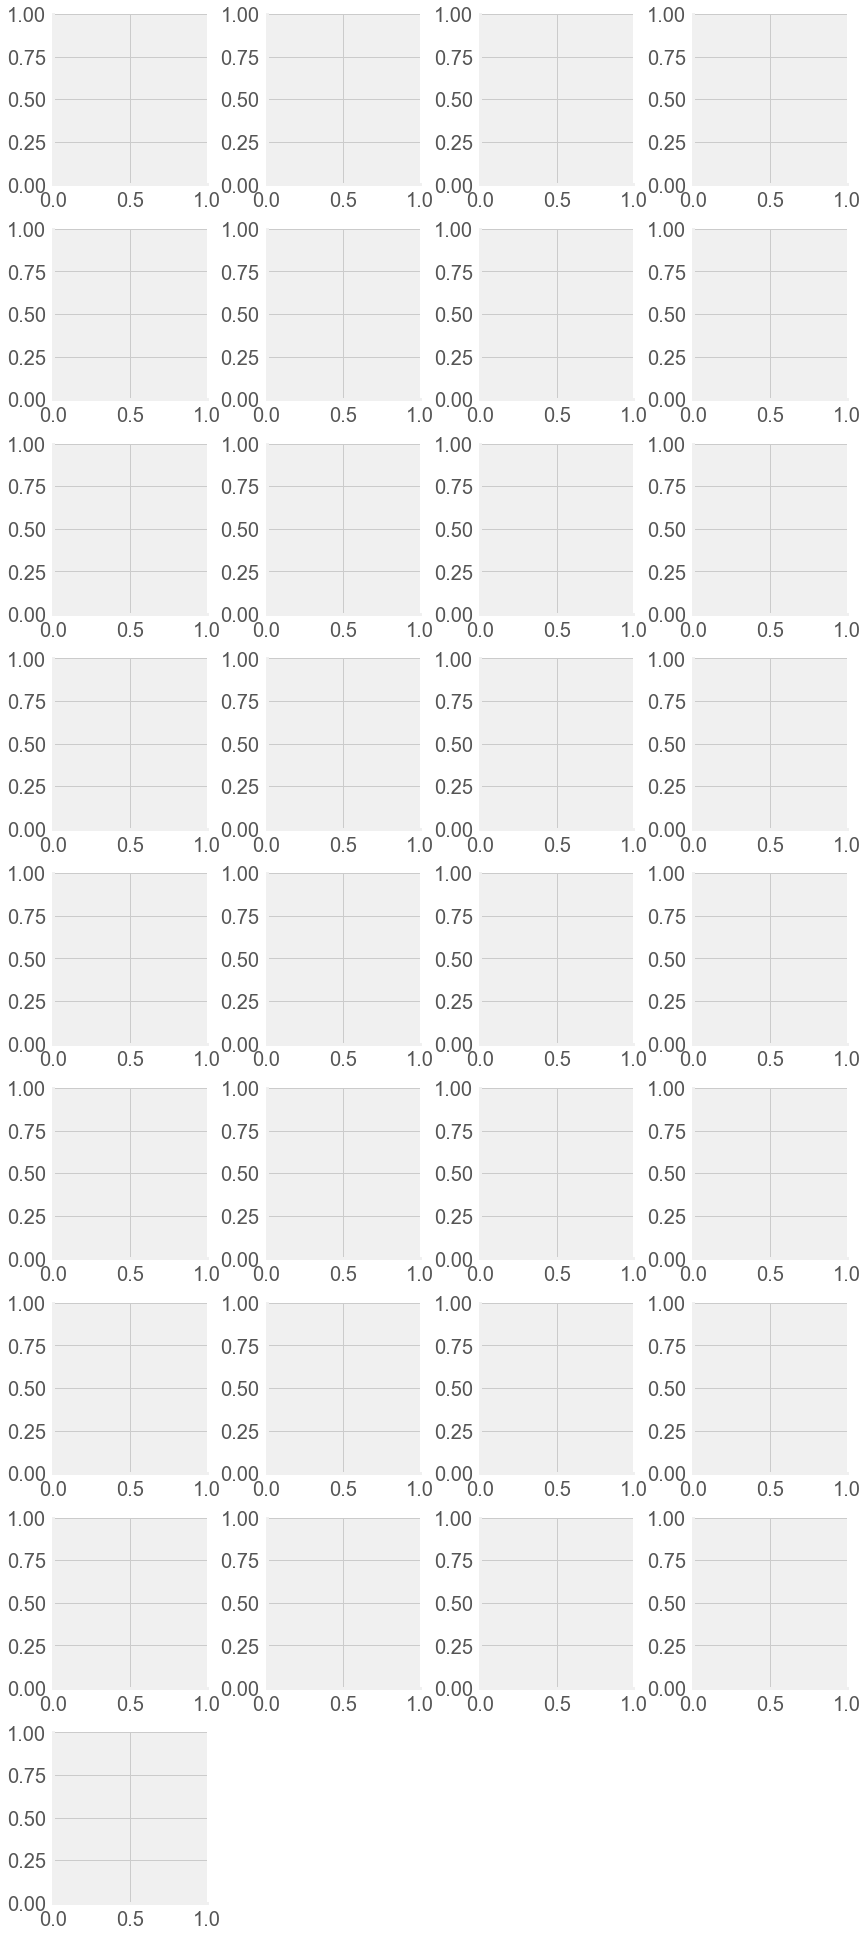

In [72]:
#create numeric plots
num = [f for f in data.columns if data.dtypes[f] != 'object']
#num.remove('Id')
nd = pd.melt(data, value_vars = num)
n1 = sns.FacetGrid (nd, col='variable', col_wrap=4, sharex=False, sharey = False)
n1 = n1.map(sns.distplot(color = ['b', 'r']), 'value', color = ['b', 'r'])
n1

In [ ]:
#def boxplot(x,y,**kwargs):
            sns.boxplot(x=x,y=y)
            x = plt.xticks(rotation=90)

cat = [f for f in data.columns if data.dtypes[f] == 'object']

p = pd.melt(data, id_vars='score', value_vars=cat)
g = sns.FacetGrid (p, col='variable', col_wrap=2, sharex=False, sharey=False, size=5)
g = g.map(boxplot, 'value','score')
g

KeyboardInterrupt: 

In [73]:
# Select the numeric columns
numeric_subset = data.select_dtypes('number')

# Create columns with square root and log of numeric columns
for col in numeric_subset.columns:
    # Skip the Energy Star Score column
    if col == 'score':
        next
    else:
        numeric_subset['sqrt_' + col] = np.sqrt(numeric_subset[col])
        numeric_subset['log_' + col] = np.log(numeric_subset[col])



C:\Users\Gnanendra\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log
  # This is added back by InteractiveShellApp.init_path()
C:\Users\Gnanendra\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in sqrt
  # Remove the CWD from sys.path while we load stuff.
C:\Users\Gnanendra\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


In [76]:
# Select the categorical columns
categorical_subset = data[['Borough', 'Metered Areas (Energy)', 'Water Required?']]



In [77]:
# One hot encode
categorical_subset = pd.get_dummies(categorical_subset)



In [78]:
# Join the two dataframes using concat
# Make sure to use axis = 1 to perform a column bind
features = pd.concat([numeric_subset, categorical_subset], axis = 1)



In [80]:
features.to_csv("Features.csv", index=True)

In [81]:
# Drop buildings without an energy star score
features = features.dropna(subset = ['score'])

# Find correlations with the score 
correlations = features.corr()['score'].dropna().sort_values()

In [82]:
correlations

Site EUI (kBtu/ft²)                                               -0.726674
Weather Normalized Site EUI (kBtu/ft²)                            -0.714033
sqrt_Site EUI (kBtu/ft²)                                          -0.703835
sqrt_Weather Normalized Site EUI (kBtu/ft²)                       -0.690622
sqrt_Weather Normalized Source EUI (kBtu/ft²)                     -0.689289
sqrt_Source EUI (kBtu/ft²)                                        -0.686808
Weather Normalized Source EUI (kBtu/ft²)                          -0.666207
Source EUI (kBtu/ft²)                                             -0.660579
log_Source EUI (kBtu/ft²)                                         -0.632682
log_Weather Normalized Source EUI (kBtu/ft²)                      -0.630494
log_Site EUI (kBtu/ft²)                                           -0.612937
log_Weather Normalized Site EUI (kBtu/ft²)                        -0.600332
log_Weather Normalized Site Electricity Intensity (kWh/ft²)       -0.445914
sqrt_Weather

In [84]:
# Copy the original data
features = data.copy()

# Select the numeric columns
numeric_subset = data.select_dtypes('number')

# Create columns with log of numeric columns
for col in numeric_subset.columns:
    # Skip the Energy Star Score column
    if col == 'score':
        next
    else:
        numeric_subset['log_' + col] = np.log(numeric_subset[col])
        
# Select the categorical columns
categorical_subset = data[['Borough', 'Largest Property Use Type', 'Metered Areas (Energy)', 'Water Required?']]

# One hot encode
categorical_subset = pd.get_dummies(categorical_subset)

# Join the two dataframes using concat
# Make sure to use axis = 1 to perform a column bind
features = pd.concat([numeric_subset, categorical_subset], axis = 1)

features.shape

C:\Users\Gnanendra\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log
  del sys.path[0]
C:\Users\Gnanendra\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in log
  del sys.path[0]


(8571, 116)

In [85]:
features.to_excel("FinalFeatures.xls", index=True)

In [2]:
import os

In [3]:
os.getcwd()

'C:\\Users\\Gnanendra\\Downloads'

In [4]:
os.chdir("D:\INSOFE\Mith\Data_Forall")

In [89]:
# Extract the buildings with no score and the buildings with a score
no_score = features[features['score'].isna()]
score = features[features['score'].notnull()]

print(no_score.shape)
print(score.shape)

(1425, 116)
(7146, 116)


In [57]:
import os

In [59]:
os.getcwd()

'D:\\INSOFE\\MyPractice and Work\\WaterResource'

In [60]:
os.chdir("D:\INSOFE\Mith\Data_Forall")

In [96]:
train = pd.read_csv("train_final.csv")
test = pd.read_csv("test_final.csv")

In [97]:
train.head()

,Unnamed: 0,Price,YearOfVehicleRegistration,PowerOfTheEngine,DistranceTravelled,MonthOfVehicleRegistration,MonthofAdCreation,MonthofAdLastSeen,DayofAdCreation,DayofAdLastSeen,VehicleType_Other,VehicleType_Small Car,VehicleType_bus,VehicleType_cabrio,VehicleType_coupe,VehicleType_limousine,VehicleType_suv,GearBoxType_manual,TypeOfTheFuelUsed_diesel,TypeOfTheFuelUsed_electro,TypeOfTheFuelUsed_hybrid,TypeOfTheFuelUsed_lpg,TypeOfTheFuelUsed_other,TypeOfTheFuelUsed_petrol,IsDamageRepaired_Yes
0,0,3850,2004,94,50000,7,4,4,3,7,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0
1,1,5999,2007,140,150000,5,3,3,8,11,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0
2,2,5990,2007,150,150000,2,3,3,26,26,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0
3,3,4000,2005,150,150000,9,3,3,11,12,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0
4,4,12950,2005,200,125000,3,3,4,17,7,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0


In [98]:
test.head()

,Unnamed: 0,YearOfVehicleRegistration,PowerOfTheEngine,DistranceTravelled,MonthOfVehicleRegistration,MonthofAdCreation,MonthofAdLastSeen,DayofAdCreation,DayofAdLastSeen,IsDamageRepaired_Yes,TypeOfTheFuelUsed_diesel,TypeOfTheFuelUsed_electro,TypeOfTheFuelUsed_hybrid,TypeOfTheFuelUsed_lpg,TypeOfTheFuelUsed_other,TypeOfTheFuelUsed_petrol,VehicleType_Other,VehicleType_Small Car,VehicleType_bus,VehicleType_cabrio,VehicleType_coupe,VehicleType_limousine,VehicleType_suv,GearBoxType_manual
0,0,2004,163,125000,8,3,5,14,4,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
1,1,2004,131,150000,2,3,3,21,23,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,2,2011,190,70000,3,3,6,21,4,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1
3,3,2007,136,150000,6,3,5,23,4,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1
4,4,2002,193,150000,9,3,3,18,18,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [99]:
train = train.drop(['Unnamed: 0'], axis =1)

In [100]:
test = test.drop(['Unnamed: 0'], axis=1)

In [101]:
from scipy import stats
from scipy.stats import norm

In [102]:
# Separate out the features and targets

target = np.log(train['Price'])

In [103]:
train = train.drop(columns='Price')

In [69]:
features.head()

,YearOfVehicleRegistration,PowerOfTheEngine,DistranceTravelled,MonthOfVehicleRegistration,MonthofAdCreation,MonthofAdLastSeen,DayofAdCreation,DayofAdLastSeen,VehicleType_Other,VehicleType_Small Car,VehicleType_bus,VehicleType_cabrio,VehicleType_coupe,VehicleType_limousine,VehicleType_suv,GearBoxType_manual,TypeOfTheFuelUsed_diesel,TypeOfTheFuelUsed_electro,TypeOfTheFuelUsed_hybrid,TypeOfTheFuelUsed_lpg,TypeOfTheFuelUsed_other,TypeOfTheFuelUsed_petrol,IsDamageRepaired_Yes
0,2004,94,50000,7,4,4,3,7,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0
1,2007,140,150000,5,3,3,8,11,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0
2,2007,150,150000,2,3,3,26,26,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0
3,2005,150,150000,9,3,3,11,12,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0
4,2005,200,125000,3,3,4,17,7,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0


In [104]:
test.shape

(19594, 23)

In [105]:
train.shape

(58850, 23)

In [106]:
X = train

In [107]:
y = target

In [108]:
y.head()

0    8.255828
1    8.699348
2    8.697847
3    8.294050
4    9.468851
Name: Price, dtype: float64

In [109]:
# Split into 70% training and 30% testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

print(X.shape)
print(X_test.shape)
print(y.shape)
print(y_test.shape)

(58850, 23)
(17655, 23)
(58850,)
(17655,)


In [110]:
y.head()

0    8.255828
1    8.699348
2    8.697847
3    8.294050
4    9.468851
Name: Price, dtype: float64

In [111]:
# Function to calculate mean absolute error
def mae(y_true, y_pred):
    return np.mean(abs(y_true - y_pred))

In [53]:
baseline_guess = np.median(y)

print('The baseline guess is a score of %0.2f' % baseline_guess)
print("Baseline Performance on the test set: MAE = %0.4f" % mae(y_test, baseline_guess))

The baseline guess is a score of 8.60
Baseline Performance on the test set: MAE = 0.6949


In [54]:
os.chdir("D:\INSOFE\MyPractice and Work\WaterResource")

In [96]:
# Save the no scores, training, and testing data
no_score.to_csv('no_score.csv', index = False)
X.to_csv('training_features.csv', index = False)
X_test.to_csv('testing_features.csv', index = False)
y.to_csv('training_labels.csv', index = False)
y_test.to_csv('testing_labels.csv', index = False)

In [112]:
# Pandas and numpy for data manipulation
import pandas as pd
import numpy as np

# No warnings about setting value on copy of slice
pd.options.mode.chained_assignment = None
pd.set_option('display.max_columns', 60)

# Matplotlib for visualization
import matplotlib.pyplot as plt
%matplotlib inline

# Set default font size
plt.rcParams['font.size'] = 24

from IPython.core.pylabtools import figsize

# Seaborn for visualization
import seaborn as sns
sns.set(font_scale = 2)

# Imputing missing values and scaling values
from sklearn.preprocessing import Imputer, MinMaxScaler

# Machine Learning Models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

# Hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [98]:
# Read in data into dataframes 
train_features = pd.read_csv('training_features.csv')
test_features = pd.read_csv('testing_features.csv')
train_labels = pd.read_csv('training_labels.csv')
test_labels = pd.read_csv('testing_labels.csv')

# Display sizes of data
print('Training Feature Size: ', train_features.shape)
print('Testing Feature Size:  ', test_features.shape)
print('Training Labels Size:  ', train_labels.shape)
print('Testing Labels Size:   ', test_labels.shape)

Training Feature Size:  (5002, 115)
Testing Feature Size:   (2144, 115)
Training Labels Size:   (5002, 1)
Testing Labels Size:    (2144, 1)


In [113]:

# Create an imputer object with a median filling strategy
imputer = Imputer(strategy='median')

# Train on the training features
imputer.fit(X_train)

# Transform both training data and testing data
X_train = imputer.transform(X_train)
X_test = imputer.transform(X_test)

C:\Users\Gnanendra\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [49]:
print('Missing values in training features: ', np.sum(np.isnan(X)))
print('Missing values in testing features:  ', np.sum(np.isnan(X_test)))

Missing values in training features:  0
Missing values in testing features:   0


In [50]:
# Make sure all values are finite
print(np.where(~np.isfinite(X)))
print(np.where(~np.isfinite(X_test)))

(array([], dtype=int64), array([], dtype=int64))
(array([], dtype=int64), array([], dtype=int64))


In [114]:
# Create the scaler object with a range of 0-1
scaler = MinMaxScaler(feature_range=(0, 1))

# Fit on the training data
scaler.fit(X_train)

# Transform both the training and testing data
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [52]:
# Convert y to one-dimensional array (vector)
y = np.array(train_labels).reshape((-1, ))
y_test = np.array(test_labels).reshape((-1, ))

NameError: name 'train_labels' is not defined

In [115]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(41195, 23)
(17655, 23)
(41195,)
(17655,)


In [116]:
# Function to calculate mean absolute error
def rmse(y_true, y_pred):
    return np.sqrt(metrics.mean_squared_error(y_true,y_pred))

# Takes in a model, trains the model, and evaluates the model on the test set
def fit_and_evaluate(model):
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions and evalute
    model_pred = model.predict(X_test)
    model_mae = rmse(y_test, model_pred)
    
    # Return the performance metric
    return model_rmse

In [117]:
lr = LinearRegression()
lr_mae = fit_and_evaluate(lr)

print('Linear Regression Performance on the test set: MAE = %0.4f' % lr_mae)

Linear Regression Performance on the test set: MAE = 0.3331


In [118]:
#svm = SVR(C = 1000, gamma = 0.1)
#svm_mae = fit_and_evaluate(svm)

#print('Support Vector Machine Regression Performance on the test set: MAE = %0.4f' % svm_mae)

Support Vector Machine Regression Performance on the test set: MAE = 0.2801


In [119]:
random_forest = RandomForestRegressor(random_state=60)
random_forest_mae = fit_and_evaluate(random_forest)

print('Random Forest Regression Performance on the test set: MAE = %0.4f' % random_forest_mae)

C:\Users\Gnanendra\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Random Forest Regression Performance on the test set: MAE = 0.2621


In [120]:
gradient_boosted = GradientBoostingRegressor(random_state=60)
gradient_boosted_mae = fit_and_evaluate(gradient_boosted)

print('Gradient Boosted Regression Performance on the test set: MAE = %0.4f' % gradient_boosted_mae)

Gradient Boosted Regression Performance on the test set: MAE = 0.2678


In [121]:
knn = KNeighborsRegressor(n_neighbors=10)
knn_mae = fit_and_evaluate(knn)

print('K-Nearest Neighbors Regression Performance on the test set: MAE = %0.4f' % knn_mae)

K-Nearest Neighbors Regression Performance on the test set: MAE = 0.3733


In [122]:
#Model Build using XGB
from xgboost import XGBRegressor
XGB = XGBRegressor()

xgb = XGBRegressor()
xgb_mae = fit_and_evaluate(xgb)
print('Extreme Gradient Boosting Regression Perfromance on the test set: MAE = %0.4f' %xgb_mae)

Extreme Gradient Boosting Regression Perfromance on the test set: MAE = 0.2676


In [123]:
#Model Build using Bagging Regressor
from sklearn import tree
from sklearn.ensemble import VotingClassifier, BaggingRegressor, RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor

bagging = BaggingRegressor(tree.DecisionTreeRegressor(random_state = 42))
bagging_mae = fit_and_evaluate(bagging)
print('Bagging Regressor Perfromance on the test set: MAE = %0.4f' %bagging_mae)

Bagging Regressor Perfromance on the test set: MAE = 0.2620


In [124]:
#Model Build using Bagging Regressor
from sklearn import tree
from sklearn.ensemble import VotingClassifier, BaggingRegressor, RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor

Adaboost = AdaBoostRegressor()
Adaboost_mae = fit_and_evaluate(Adaboost)
print('Adaboost Regressor Perfromance on the test set: MAE = %0.4f' %Adaboost_mae)

Adaboost Regressor Perfromance on the test set: MAE = 0.3971


# Model Comparision

In [127]:
plt.style.use('fivethirtyeight')
figsize(8, 6)

# Dataframe to hold the results
model_comparison = pd.DataFrame({'model': ['Linear Regression', 'Support Vector Machine',
                                           'Random Forest', 'Gradient Boosting',
                                            'K-Nearest Neighbors', 'Extreme Gradient Boosting','Bagging Regressor',
                                            'Adaboost Regressor'],
                                 'mae': [lr_mae, svm_mae, random_forest_mae,gradient_boosted_mae, knn_mae, xgb_mae, bagging_mae, Adaboost_mae]
                                })



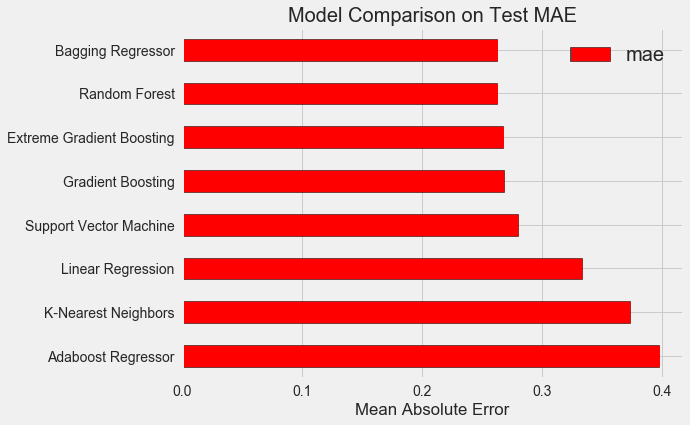

In [128]:
# Horizontal bar chart of test mae
model_comparison.sort_values('mae', ascending = False).plot(x = 'model', y = 'mae', kind = 'barh',
                                                           color = 'red', edgecolor = 'black')

# Plot formatting
plt.ylabel(''); plt.yticks(size = 14); plt.xlabel('Mean Absolute Error'); plt.xticks(size = 14)
plt.title('Model Comparison on Test MAE', size = 20);

In [129]:
# Loss function to be optimized
loss = ['ls', 'lad', 'huber']

# Number of trees used in the boosting process
n_estimators = [100, 500, 900, 1100, 1500]

# Maximum depth of each tree
max_depth = [2, 3, 5, 10, 15]

# Minimum number of samples per leaf
min_samples_leaf = [1, 2, 4, 6, 8]

# Minimum number of samples to split a node
min_samples_split = [2, 4, 6, 10]

# Maximum number of features to consider for making splits
max_features = ['auto', 'sqrt', 'log2', None]

# Define the grid of hyperparameters to search
hyperparameter_grid = {'loss': loss,
                       'n_estimators': n_estimators,
                       'max_depth': max_depth,
                       'min_samples_leaf': min_samples_leaf,
                       'min_samples_split': min_samples_split,
                       'max_features': max_features}

In [130]:
# Create the model to use for hyperparameter tuning
model = XGBRegressor(random_state = 42)

# Set up the random search with 4-fold cross validation
random_cv = RandomizedSearchCV(estimator=model,
                               param_distributions=hyperparameter_grid,
                               cv=4, n_iter=25, 
                               scoring = 'neg_mean_absolute_error',
                               n_jobs = -1, verbose = 1, 
                               return_train_score = True,
                               random_state=42)

In [131]:
# Fit on the training data
random_cv.fit(X, y)

Fitting 4 folds for each of 25 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed: 23.5min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed: 47.4min finished


RandomizedSearchCV(cv=4, error_score='raise-deprecating',
          estimator=XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=42,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1),
          fit_params=None, iid='warn', n_iter=25, n_jobs=-1,
          param_distributions={'loss': ['ls', 'lad', 'huber'], 'n_estimators': [100, 500, 900, 1100, 1500], 'max_depth': [2, 3, 5, 10, 15], 'min_samples_leaf': [1, 2, 4, 6, 8], 'min_samples_split': [2, 4, 6, 10], 'max_features': ['auto', 'sqrt', 'log2', None]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score=True, scoring='neg_mean_absolute_error',
          verbose=1)

In [132]:
# Get all of the cv results and sort by the test performance
random_results = pd.DataFrame(random_cv.cv_results_).sort_values('mean_test_score', ascending = False)

random_results.head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_features,param_max_depth,param_loss,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,mean_train_score,std_train_score
5,77.776463,1.153246,1.723930,0.561940,900,6,8,log2,5,lad,"{'n_estimators': 900, 'min_samples_split': 6, ...",-0.239973,-0.234747,-0.238419,-0.238348,-0.237872,0.001917,1,-0.204726,-0.205907,-0.205686,-0.204592,-0.205228,0.000576
22,145.188113,0.947061,6.052743,0.971176,1500,2,8,None,5,ls,"{'n_estimators': 1500, 'min_samples_split': 2,...",-0.240089,-0.235175,-0.238358,-0.238339,-0.237990,0.001774,2,-0.191193,-0.191029,-0.191808,-0.190996,-0.191257,0.000327
13,149.681321,0.987516,5.882849,0.895952,1500,10,1,sqrt,5,lad,"{'n_estimators': 1500, 'min_samples_split': 10...",-0.240089,-0.235175,-0.238358,-0.238339,-0.237990,0.001774,2,-0.191193,-0.191029,-0.191808,-0.190996,-0.191257,0.000327
12,52.967116,3.049540,0.685825,0.047983,500,6,6,None,5,lad,"{'n_estimators': 500, 'min_samples_split': 6, ...",-0.241235,-0.236199,-0.240279,-0.239617,-0.239332,0.001898,4,-0.218026,-0.218949,-0.218784,-0.217940,-0.218425,0.000447
3,44.474888,0.097575,0.773521,0.174952,500,6,8,None,5,huber,"{'n_estimators': 500, 'min_samples_split': 6, ...",-0.241235,-0.236199,-0.240279,-0.239617,-0.239332,0.001898,4,-0.218026,-0.218949,-0.218784,-0.217940,-0.218425,0.000447
21,51.867550,0.345965,0.767273,0.075294,500,6,4,log2,5,huber,"{'n_estimators': 500, 'min_samples_split': 6, ...",-0.241235,-0.236199,-0.240279,-0.239617,-0.239332,0.001898,4,-0.218026,-0.218949,-0.218784,-0.217940,-0.218425,0.000447
1,17.345480,0.040474,0.347784,0.003672,100,6,8,sqrt,10,huber,"{'n_estimators': 100, 'min_samples_split': 6, ...",-0.241206,-0.237196,-0.240878,-0.239175,-0.239614,0.001595,7,-0.183196,-0.186008,-0.185535,-0.185211,-0.184987,0.001073
24,20.514261,0.521383,0.341289,0.018271,100,4,8,sqrt,10,lad,"{'n_estimators': 100, 'min_samples_split': 4, ...",-0.241206,-0.237196,-0.240878,-0.239175,-0.239614,0.001595,7,-0.183196,-0.186008,-0.185535,-0.185211,-0.184987,0.001073
15,29.567644,0.358349,0.980642,0.139509,100,4,8,auto,15,ls,"{'n_estimators': 100, 'min_samples_split': 4, ...",-0.242053,-0.238531,-0.241727,-0.239841,-0.240538,0.001434,9,-0.101819,-0.103969,-0.108198,-0.101078,-0.103766,0.002770
2,86.724909,0.904647,4.850989,0.065010,500,4,2,auto,10,huber,"{'n_estimators': 500, 'min_samples_split': 4, ...",-0.244082,-0.239374,-0.242757,-0.240984,-0.241799,0.001780,10,-0.087835,-0.086637,-0.089567,-0.089726,-0.088441,0.001278


In [133]:
random_cv.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, loss='lad',
       max_delta_step=0, max_depth=5, max_features='log2',
       min_child_weight=1, min_samples_leaf=8, min_samples_split=6,
       missing=None, n_estimators=900, n_jobs=1, nthread=None,
       objective='reg:linear', random_state=42, reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=None, silent=True, subsample=1)

In [119]:
# Create a range of trees to evaluate
trees_grid = {'n_estimators': [100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 800]}

model = XGBRegressor(loss = 'lad', max_depth = 5,
                                  min_samples_leaf = 6,
                                  min_samples_split = 6,
                                  max_features = None,
                                  random_state = 42)

# Grid Search Object using the trees range and the random forest model
grid_search = GridSearchCV(estimator = model, param_grid=trees_grid, cv = 4, 
                           scoring = 'neg_mean_absolute_error', verbose = 1,
                           n_jobs = -1, return_train_score = True)

In [134]:
# Create a range of trees to evaluate
trees_grid = {'n_estimators': [100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 800]}

model = XGBRegressor(loss = 'lad', max_depth = 5,
                                  min_samples_leaf = 6,
                                  min_samples_split = 6,
                                  max_features = None,
                                  random_state = 42)

# Grid Search Object using the trees range and the random forest model
grid_search = GridSearchCV(estimator = model, param_grid=trees_grid, cv = 4, 
                           scoring = 'neg_mean_absolute_error', verbose = 1,
                           n_jobs = -1, return_train_score = True)

In [135]:
# Fit the grid search
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 15 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  4.6min
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:  8.2min finished


GridSearchCV(cv=4, error_score='raise-deprecating',
       estimator=XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, loss='lad',
       max_delta_step=0, max_depth=5, max_features=None,
       min_child_weight=1, min_samples_leaf=6, min_samples_split=6,
       missing=None, n_estimators=100, n_jobs=1, nthread=None,
       objective='reg:linear', random_state=42, reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=None, silent=True, subsample=1),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'n_estimators': [100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 800]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=1)

In [136]:
# Get the results into a dataframe
results = pd.DataFrame(grid_search.cv_results_)
results


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,mean_train_score,std_train_score
0,6.612645,0.157611,0.084696,0.003628,100,{'n_estimators': 100},-0.251919,-0.254409,-0.253233,-0.255050,-0.253653,0.001194,15,-0.244637,-0.243648,-0.245771,-0.243835,-0.244473,0.000836
1,9.487109,0.142334,0.155154,0.018886,150,{'n_estimators': 150},-0.248370,-0.250789,-0.248441,-0.251267,-0.249717,0.001322,14,-0.238327,-0.236909,-0.238234,-0.237552,-0.237755,0.000573
2,11.710229,0.059623,0.180388,0.006647,200,{'n_estimators': 200},-0.245778,-0.248346,-0.245539,-0.248523,-0.247047,0.001392,13,-0.233350,-0.231720,-0.232840,-0.231957,-0.232466,0.000659
3,15.651534,0.134130,0.254841,0.080830,250,{'n_estimators': 250},-0.243858,-0.246265,-0.243692,-0.246923,-0.245185,0.001430,12,-0.228839,-0.227020,-0.228515,-0.227681,-0.228014,0.000713
4,19.858420,0.077204,0.280576,0.010864,300,{'n_estimators': 300},-0.242372,-0.245776,-0.242453,-0.245783,-0.244096,0.001684,11,-0.225120,-0.223777,-0.224998,-0.224269,-0.224541,0.000548
5,22.998971,0.149545,0.384012,0.062645,350,{'n_estimators': 350},-0.241325,-0.244549,-0.241606,-0.244651,-0.243033,0.001571,10,-0.221781,-0.220307,-0.221965,-0.220827,-0.221220,0.000681
6,26.247704,0.108400,0.373018,0.022717,400,{'n_estimators': 400},-0.240803,-0.243913,-0.240926,-0.243810,-0.242363,0.001500,9,-0.218823,-0.217272,-0.219002,-0.218012,-0.218277,0.000690
7,29.098183,0.269074,0.563901,0.014963,450,{'n_estimators': 450},-0.240519,-0.243342,-0.240469,-0.243414,-0.241936,0.001442,8,-0.216242,-0.214382,-0.216236,-0.215465,-0.215581,0.000761
8,34.557795,0.123134,0.590883,0.030685,500,{'n_estimators': 500},-0.240189,-0.243039,-0.240318,-0.243077,-0.241656,0.001403,7,-0.213434,-0.211928,-0.213816,-0.213010,-0.213047,0.000706
9,34.068099,0.198128,0.657592,0.129754,550,{'n_estimators': 550},-0.239951,-0.242977,-0.240290,-0.242727,-0.241486,0.001374,6,-0.211357,-0.209390,-0.211392,-0.210689,-0.210707,0.000810


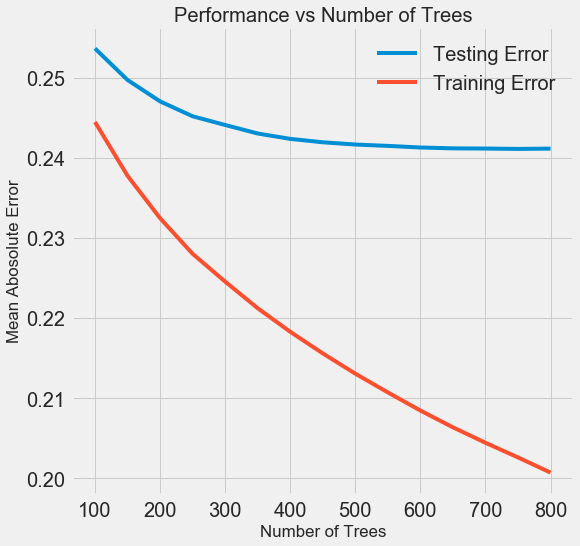

In [137]:
# Plot the training and testing error vs number of trees
figsize(8, 8)
plt.style.use('fivethirtyeight')
plt.plot(results['param_n_estimators'], -1 * results['mean_test_score'], label = 'Testing Error')
plt.plot(results['param_n_estimators'], -1 * results['mean_train_score'], label = 'Training Error')
plt.xlabel('Number of Trees'); plt.ylabel('Mean Abosolute Error'); plt.legend();
plt.title('Performance vs Number of Trees');

In [138]:
results.sort_values('mean_test_score', ascending = False).head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,mean_train_score,std_train_score
13,51.343124,0.727349,1.211998,0.317043,750,{'n_estimators': 750},-0.239562,-0.243074,-0.239781,-0.242015,-0.241108,0.001487,1,-0.203021,-0.201719,-0.203005,-0.202608,-0.202588,0.000528
14,52.562868,0.980871,1.292447,0.279079,800,{'n_estimators': 800},-0.239582,-0.243034,-0.239937,-0.242039,-0.241148,0.001438,2,-0.200942,-0.199941,-0.201089,-0.200807,-0.200695,0.000447
12,48.097889,0.387203,1.185264,0.194862,700,{'n_estimators': 700},-0.239630,-0.243051,-0.239873,-0.242066,-0.241155,0.001448,3,-0.204860,-0.203506,-0.204873,-0.204434,-0.204418,0.000555
11,43.213672,0.250733,0.825238,0.060766,650,{'n_estimators': 650},-0.239618,-0.242968,-0.239882,-0.242251,-0.241180,0.001455,4,-0.206653,-0.205431,-0.206992,-0.206314,-0.206347,0.000581
10,41.156198,0.659032,0.865464,0.114779,600,{'n_estimators': 600},-0.239797,-0.242885,-0.240032,-0.242427,-0.241285,0.001383,5,-0.209001,-0.207230,-0.209187,-0.208360,-0.208444,0.000766


# Evaluate Final Model on the Test Set

In [139]:
# Default model
default_model = XGBRegressor(random_state = 42)

# Select the best model
final_model = grid_search.best_estimator_

final_model

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, loss='lad',
       max_delta_step=0, max_depth=5, max_features=None,
       min_child_weight=1, min_samples_leaf=6, min_samples_split=6,
       missing=None, n_estimators=750, n_jobs=1, nthread=None,
       objective='reg:linear', random_state=42, reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=None, silent=True, subsample=1)

In [140]:
%%timeit -n 1 -r 5
default_model.fit(X, y)

4.04 s ± 241 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)


In [141]:
%%timeit -n 1 -r 5
final_model.fit(X, y)

50.5 s ± 839 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)


In [142]:
default_pred = default_model.predict(X_test)
final_pred = final_model.predict(X_test)

print('Default model performance on the test set: MAE = %0.4f.' % mae(y_test, default_pred))
print('Final model performance on the test set:   MAE = %0.4f.' % mae(y_test, final_pred))

ValueError: feature_names mismatch: ['YearOfVehicleRegistration', 'PowerOfTheEngine', 'DistranceTravelled', 'MonthOfVehicleRegistration', 'MonthofAdCreation', 'MonthofAdLastSeen', 'DayofAdCreation', 'DayofAdLastSeen', 'VehicleType_Other', 'VehicleType_Small Car', 'VehicleType_bus', 'VehicleType_cabrio', 'VehicleType_coupe', 'VehicleType_limousine', 'VehicleType_suv', 'GearBoxType_manual', 'TypeOfTheFuelUsed_diesel', 'TypeOfTheFuelUsed_electro', 'TypeOfTheFuelUsed_hybrid', 'TypeOfTheFuelUsed_lpg', 'TypeOfTheFuelUsed_other', 'TypeOfTheFuelUsed_petrol', 'IsDamageRepaired_Yes'] ['f0', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10', 'f11', 'f12', 'f13', 'f14', 'f15', 'f16', 'f17', 'f18', 'f19', 'f20', 'f21', 'f22']
expected MonthofAdLastSeen, DayofAdLastSeen, TypeOfTheFuelUsed_hybrid, VehicleType_limousine, DayofAdCreation, TypeOfTheFuelUsed_other, TypeOfTheFuelUsed_lpg, VehicleType_suv, IsDamageRepaired_Yes, DistranceTravelled, MonthofAdCreation, TypeOfTheFuelUsed_diesel, VehicleType_bus, GearBoxType_manual, VehicleType_Small Car, PowerOfTheEngine, TypeOfTheFuelUsed_electro, YearOfVehicleRegistration, MonthOfVehicleRegistration, VehicleType_cabrio, VehicleType_Other, TypeOfTheFuelUsed_petrol, VehicleType_coupe in input data
training data did not have the following fields: f1, f16, f10, f9, f2, f0, f7, f20, f14, f17, f8, f12, f5, f21, f3, f22, f19, f13, f15, f4, f11, f18, f6

# Distribution of True and Predicted values on the Test Dataset|

In [143]:
figsize(8, 8)

# Density plot of the final predictions and the test values
sns.kdeplot(y_pre, label = 'Predictions')
sns.kdeplot(y_test, label = 'Values')

# Label the plot
plt.xlabel('Price'); plt.ylabel('Density');
plt.title('Test Values and Predictions');

NameError: name 'final_pred' is not defined

# Distribution of Reesiduals

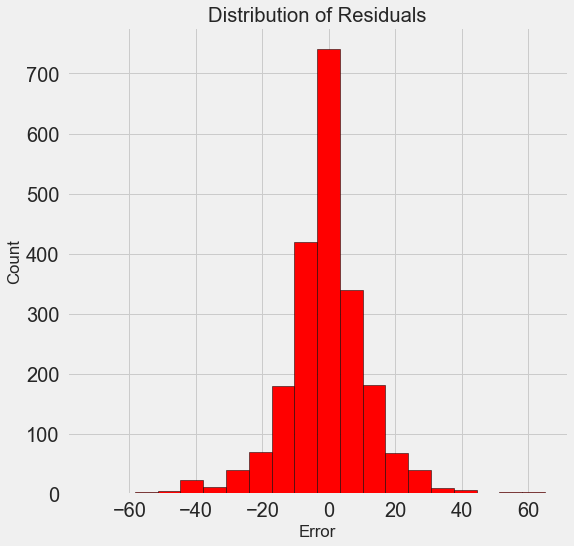

In [132]:
figsize = (6, 6)

# Calculate the residuals 
residuals = final_pred - y_test

# Plot the residuals in a histogram
plt.hist(residuals, color = 'red', bins = 20,
         edgecolor = 'black')
plt.xlabel('Error'); plt.ylabel('Count')
plt.title('Distribution of Residuals');

# Feature Importance

In [149]:
model = GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='lad', max_depth=5, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=6,
             min_samples_split=6, min_weight_fraction_leaf=0.0,
             n_estimators=450, n_iter_no_change=None, presort='auto',
             random_state=42, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)
model.fit(X,y)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='lad', max_depth=5, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=6,
             min_samples_split=6, min_weight_fraction_leaf=0.0,
             n_estimators=450, n_iter_no_change=None, presort='auto',
             random_state=42, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [150]:
#  Make predictions on the test set
model_pred = model.predict(X_test)

print('Final Model Performance on the test set: MAE = %0.4f' % mae(y_test, model_pred))

Final Model Performance on the test set: MAE = 8.5689


In [151]:
len(model.feature_importances_)

114

In [152]:
len(train_features.columns)

114

In [146]:
#train_features = train_features.drop(columns=["Order"], axis=1)

In [160]:
model.feature_importances_

array([5.47597008e-03, 1.27153070e-02, 5.80236245e-03, 4.01070766e-03,
       1.04364203e-02, 4.04234635e-04, 3.45501375e-04, 5.45270256e-02,
       4.20065288e-03, 6.55133181e-03, 1.13673296e-03, 5.12658207e-03,
       3.36358275e-03, 3.25191300e-03, 3.17377543e-03, 2.99828219e-03,
       7.57545620e-03, 5.10252601e-03, 4.11756939e-03, 4.17355999e-03,
       7.18031312e-03, 5.56335356e-03, 4.63988494e-01, 4.80975889e-03,
       9.13645431e-03, 1.68704670e-03, 1.03897727e-03, 3.81174647e-03,
       5.32922249e-03, 1.19823237e-02, 6.34708099e-03, 4.38702595e-03,
       8.59761815e-03, 2.37199655e-04, 4.67375848e-04, 1.30873661e-02,
       4.68881014e-03, 5.00754085e-03, 1.21041643e-03, 5.01469835e-03,
       3.90968286e-03, 3.22309231e-03, 4.29448881e-03, 3.92454683e-03,
       7.98827504e-03, 7.07031245e-03, 4.32510908e-03, 3.89679571e-03,
       1.07423186e-02, 7.14003750e-03, 5.34495958e-02, 5.02461505e-03,
       1.54481181e-03, 1.75402531e-03, 4.09236238e-03, 1.58027112e-04,
      

In [159]:
## plot the importances ##
importances = model.feature_importances_
std = np.std([tree.feature_importances_ for tree in model.estimators_], axis=0)
indices = np.argsort(importances)[::-1][:20]

plt.figure(figsize=(12,12))
plt.title("Feature importances")
plt.bar(range(len(indices)), importances[indices], color="r", yerr=std[indices], align="center")
plt.xticks(range(len(indices)), feat_names[indices], rotation='vertical')
plt.xlim([-1, len(indices)])
plt.show()

AttributeError: 'numpy.ndarray' object has no attribute 'feature_importances_'